<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:Purple;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:White;
          text-align:Center;"
          >
       Kelompok 2 - Fisika 2021

### **Mata Kuliah: Kapita Selekta**

#### Dosen Pengampu:
**Dr. rer. nat. Bambang Heru Iswanto, M.Si.**

#### Anggota Kelompok:
1. **Muhammad Akmalluddin (1306621014)** - *Commander of modelling data*
2. **Rasyid Ustman Ramadhan (1306621019)** - *Analyzer FFT*
3. **Muhammad Rosyid Suseno (1306621023)** - *Master of clustering and PCA*

### Projek Kelompok:
**Ozon Level Detection** - Menganalisa dataset Ozon Level detection menggunakan fast fourier transform, melakukan visualisasi dan reduksi data (PCA), dan membuat prediksi modelling. 🚀


<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:White;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          text-align:Center;"
          >
      About Dataset: Ozon Level Detection

All the attribute start with T means the temperature measured at different time throughout the day; and those starts with WS indicate the wind speed at various time. This dataset contains:
   1. **Date:** Data collection time
   2. **WSR 0-23:** Hourly wind speed data acquisition 
   3. **WSR_PK:** Peak wind speed in a day
   4. **WSR_AV:** Average wind speed in a day
   5. **T 0-23:** Hourly temperature data acquisition
   6. **T_PK:** Peak temperature in a day
   7. **T_AV:** Average temperature in a day
   8. **T85, T70, T50:** T at 850, 700, and 500 hpa level (1500m heigh, 3100m height, and 5500 m height)
   9. **RH85, RH70, RH50:** Relative Humidity at 850, 700, and 500 hpa level (1500m heigh, 3100m height, and 5500 m height)
   10. **U85, U70, U50:** U Wind (east-west direction wind) at 850, 700, and 500 hpa level (1500m heigh, 3100m height, and 5500 m height)
   11. **V85, V70, V50:** V Wind (north-south direction wind) at 850, 700, and 500 hpa level (1500m heigh, 3100m height, and 5500 m height)
   12. **RH85, RH70, RH50:** Geopotential at 850, 700, and 500 hpa level (1500m heigh, 3100m height, and 5500 m height)
   13. **KI:** K-Index (quantifies disturbances in the horizontal component of earth's magnetic field)
   14. **TT:** T-Totals (the Vertical Totals Index (temperature at 850 mb minus temperature at 500 mb) and the Cross Totals Index (dew point at 850 mb minus temperature at 500 mb).)
   15. **SLP:** Sea level pressure
   16. **SLP_** SLP change from previous day
   17. **Precp** Precipitation
   18. **Target** 1 indicates ozon day and 0 indicates normal day

#### Libraries
Import the required libary

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import plotly.express as px
from matplotlib.lines import Line2D
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report


#### Input Data to Notebook
Input csv data using pandas and save it to pandas dataframe

In [187]:
df = pd.read_csv('eighthr.data.csv')
df.columns = ["Date","WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50","U50","V50","HT50","KI","TT","SLP","SLP_","Precp","Target"]
df

Date WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8  ...  RH50  \
0       1/2/1998  2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  ...  0.48   
1       1/3/1998  2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  ...   0.6   
2       1/4/1998  4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  ...  0.49   
3       1/5/1998  2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  ...     ?   
4       1/6/1998  3.1  3.5  3.3  2.5  1.6  1.7  1.6  1.6  2.3  ...  0.09   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
2528  12/27/2004  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  ...  0.07   
2529  12/28/2004    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  ...  0.04   
2530  12/29/2004  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  ...  0.06   
2531  12/30/2004  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9  ...  0.25   
2532  12/31/2004  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6  ...  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp Target  
0      8.39   3.84  5805  14.05     29  10275  -55     0    0.0  
1      6.94    9.8  5790   17.9   41.3  10235  -40     0    0.0  
2      8.73  10.54  5775  31.15   51.7  10195  -40  2.08    0.0  
3         ?      ?     ?      ?      ?      ?    ?  0.58    0.0  
4     11.98  11.28  5770  27.95  46.25  10120    ?  5.84    0.0  
...     ...    ...   ...    ...    ...    ...  ...   ...    ...  
2528   7.93  -4.41  5800  -25.6   21.8  10295   65     0    0.0  
2529   5.95  -1.14  5845  -19.4   19.1  10310   15     0    0.0  
2530    7.8  -0.64  5845   -9.6   35.2  10275  -35     0    0.0  
2531   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05    0.0  
2532  13.07   9.15  5820   1.95  39.35  10220  -25     0    0.0  

[2533 rows x 74 columns]

#### Dataframe Information
Generate dataframe information

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2533 non-null   object 
 1   WSR0    2533 non-null   object 
 2   WSR1    2533 non-null   object 
 3   WSR2    2533 non-null   object 
 4   WSR3    2533 non-null   object 
 5   WSR4    2533 non-null   object 
 6   WSR5    2533 non-null   object 
 7   WSR6    2533 non-null   object 
 8   WSR7    2533 non-null   object 
 9   WSR8    2533 non-null   object 
 10  WSR9    2533 non-null   object 
 11  WSR10   2533 non-null   object 
 12  WSR11   2533 non-null   object 
 13  WSR12   2533 non-null   object 
 14  WSR13   2533 non-null   object 
 15  WSR14   2533 non-null   object 
 16  WSR15   2533 non-null   object 
 17  WSR16   2533 non-null   object 
 18  WSR17   2533 non-null   object 
 19  WSR18   2533 non-null   object 
 20  WSR19   2533 non-null   object 
 21  WSR20   2533 non-null   object 
 22  

In [189]:
df.describe()

Target
count  2533.000000
mean      0.063166
std       0.243310
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

#### Convert Object to Float
Convert data object to float for each column

In [190]:
column = ["WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50","U50","V50","HT50","KI","TT","SLP","SLP_","Precp"]

df[column] = df[column].apply(pd.to_numeric, errors='coerce')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2533 non-null   object 
 1   WSR0    2234 non-null   float64
 2   WSR1    2241 non-null   float64
 3   WSR2    2239 non-null   float64
 4   WSR3    2241 non-null   float64
 5   WSR4    2240 non-null   float64
 6   WSR5    2241 non-null   float64
 7   WSR6    2242 non-null   float64
 8   WSR7    2244 non-null   float64
 9   WSR8    2243 non-null   float64
 10  WSR9    2246 non-null   float64
 11  WSR10   2245 non-null   float64
 12  WSR11   2241 non-null   float64
 13  WSR12   2246 non-null   float64
 14  WSR13   2245 non-null   float64
 15  WSR14   2245 non-null   float64
 16  WSR15   2247 non-null   float64
 17  WSR16   2249 non-null   float64
 18  WSR17   2250 non-null   float64
 19  WSR18   2247 non-null   float64
 20  WSR19   2241 non-null   float64
 21  WSR20   2239 non-null   float64
 22  

#### Check Missing Value
Check missing value (NULL or NA) for each column

In [192]:
df.isna().sum()

Date        0
WSR0      299
WSR1      292
WSR2      294
WSR3      292
         ... 
TT        125
SLP        95
SLP_      158
Precp       2
Target      0
Length: 74, dtype: int64

Fill missing value with imputation method

In [193]:
newcolumn = ["WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50","U50","V50","HT50","KI","TT","SLP","SLP_","Precp","Target"]
for i in range (len(newcolumn)) :
    df[newcolumn[i]]=df[newcolumn[i]].fillna(df[newcolumn[i]].mean())


Check missing value again

In [194]:
df.isna().sum()

Date      0
WSR0      0
WSR1      0
WSR2      0
WSR3      0
         ..
TT        0
SLP       0
SLP_      0
Precp     0
Target    0
Length: 74, dtype: int64

#### Check Duplicate Values
Count duplicate data

In [195]:
df.duplicated().sum()

0

#### Check Unique Value for Categorical
Get unique value for date column

In [196]:
df['Date'].unique()

array(['1/2/1998', '1/3/1998', '1/4/1998', ..., '12/29/2004',
       '12/30/2004', '12/31/2004'], dtype=object)

In [197]:
df['Target'].unique()

array([0., 1.])

#### Convert Date to Datetime types
Convert to datetime for easy analysis

In [198]:
df['Date'] = pd.to_datetime(df['Date'])

In [199]:
df

Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
0    1998-01-02   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1  ...   
1    1998-01-03   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2  ...   
2    1998-01-04   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4  ...   
3    1998-01-05   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3  ...   
4    1998-01-06   3.1   3.5   3.3   2.5   1.6   1.7   1.6   1.6   2.3  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2528 2004-12-27   0.3   0.4   0.5   0.5   0.2   0.3   0.4   0.4   1.3  ...   
2529 2004-12-28   1.0   1.4   1.1   1.7   1.5   1.7   1.8   1.5   2.1  ...   
2530 2004-12-29   0.8   0.8   1.2   0.9   0.4   0.6   0.8   1.1   1.5  ...   
2531 2004-12-30   1.3   0.9   1.5   1.2   1.6   1.8   1.1   1.0   1.9  ...   
2532 2004-12-31   1.5   1.3   1.8   1.4   1.2   1.7   1.6   1.4   1.6  ...   

         RH50        U50        V50         HT50         KI         TT  \
0     0.48000   8.390000   3.840000  5805.000000  14.050000  29.000000   
1     0.60000   6.940000   9.800000  5790.000000  17.900000  41.300000   
2     0.49000   8.730000  10.540000  5775.000000  31.150000  51.700000   
3     0.30478   9.872075   0.831145  5818.831062  10.520484  37.396429   
4     0.09000  11.980000  11.280000  5770.000000  27.950000  46.250000   
...       ...        ...        ...          ...        ...        ...   
2528  0.07000   7.930000  -4.410000  5800.000000 -25.600000  21.800000   
2529  0.04000   5.950000  -1.140000  5845.000000 -19.400000  19.100000   
2530  0.06000   7.800000  -0.640000  5845.000000  -9.600000  35.200000   
2531  0.25000   7.720000  -0.890000  5845.000000 -19.600000  34.200000   
2532  0.54000  13.070000   9.150000  5820.000000   1.950000  39.350000   

               SLP       SLP_  Precp  Target  
0     10275.000000 -55.000000   0.00     0.0  
1     10235.000000 -40.000000   0.00     0.0  
2     10195.000000 -40.000000   2.08     0.0  
3     10164.130435  -0.096842   0.58     0.0  
4     10120.000000  -0.096842   5.84     0.0  
...            ...        ...    ...     ...  
2528  10295.000000  65.000000   0.00     0.0  
2529  10310.000000  15.000000   0.00     0.0  
2530  10275.000000 -35.000000   0.00     0.0  
2531  10245.000000 -30.000000   0.05     0.0  
2532  10220.000000 -25.000000   0.00     0.0  

[2533 rows x 74 columns]

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2533 non-null   datetime64[ns]
 1   WSR0    2533 non-null   float64       
 2   WSR1    2533 non-null   float64       
 3   WSR2    2533 non-null   float64       
 4   WSR3    2533 non-null   float64       
 5   WSR4    2533 non-null   float64       
 6   WSR5    2533 non-null   float64       
 7   WSR6    2533 non-null   float64       
 8   WSR7    2533 non-null   float64       
 9   WSR8    2533 non-null   float64       
 10  WSR9    2533 non-null   float64       
 11  WSR10   2533 non-null   float64       
 12  WSR11   2533 non-null   float64       
 13  WSR12   2533 non-null   float64       
 14  WSR13   2533 non-null   float64       
 15  WSR14   2533 non-null   float64       
 16  WSR15   2533 non-null   float64       
 17  WSR16   2533 non-null   float64       
 18  WSR17   

Sort data by date

In [201]:
df['Date'] = pd.to_datetime(df['Date'])

# Urutkan DataFrame berdasarkan kolom 'Date'
df.sort_values(by='Date', inplace=True)

# Tambahkan kolom baru 'Urutan' dengan nomor urut
df['Date'] = range(1, len(df) + 1)

In [202]:
df

Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
0        1   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1  ...   
1        2   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2  ...   
2        3   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4  ...   
3        4   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3  ...   
4        5   3.1   3.5   3.3   2.5   1.6   1.7   1.6   1.6   2.3  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2528  2529   0.3   0.4   0.5   0.5   0.2   0.3   0.4   0.4   1.3  ...   
2529  2530   1.0   1.4   1.1   1.7   1.5   1.7   1.8   1.5   2.1  ...   
2530  2531   0.8   0.8   1.2   0.9   0.4   0.6   0.8   1.1   1.5  ...   
2531  2532   1.3   0.9   1.5   1.2   1.6   1.8   1.1   1.0   1.9  ...   
2532  2533   1.5   1.3   1.8   1.4   1.2   1.7   1.6   1.4   1.6  ...   

         RH50        U50        V50         HT50         KI         TT  \
0     0.48000   8.390000   3.840000  5805.000000  14.050000  29.000000   
1     0.60000   6.940000   9.800000  5790.000000  17.900000  41.300000   
2     0.49000   8.730000  10.540000  5775.000000  31.150000  51.700000   
3     0.30478   9.872075   0.831145  5818.831062  10.520484  37.396429   
4     0.09000  11.980000  11.280000  5770.000000  27.950000  46.250000   
...       ...        ...        ...          ...        ...        ...   
2528  0.07000   7.930000  -4.410000  5800.000000 -25.600000  21.800000   
2529  0.04000   5.950000  -1.140000  5845.000000 -19.400000  19.100000   
2530  0.06000   7.800000  -0.640000  5845.000000  -9.600000  35.200000   
2531  0.25000   7.720000  -0.890000  5845.000000 -19.600000  34.200000   
2532  0.54000  13.070000   9.150000  5820.000000   1.950000  39.350000   

               SLP       SLP_  Precp  Target  
0     10275.000000 -55.000000   0.00     0.0  
1     10235.000000 -40.000000   0.00     0.0  
2     10195.000000 -40.000000   2.08     0.0  
3     10164.130435  -0.096842   0.58     0.0  
4     10120.000000  -0.096842   5.84     0.0  
...            ...        ...    ...     ...  
2528  10295.000000  65.000000   0.00     0.0  
2529  10310.000000  15.000000   0.00     0.0  
2530  10275.000000 -35.000000   0.00     0.0  
2531  10245.000000 -30.000000   0.05     0.0  
2532  10220.000000 -25.000000   0.00     0.0  

[2533 rows x 74 columns]

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:White;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          text-align:Center;"
          >
      Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis (EDA)
Choose data we will use

In [203]:
# Dropping those which are not necessary
newdf = df.copy()
newdf.drop(['WSR0','WSR1','WSR2', 'WSR3','WSR4', 'WSR5','WSR6', 'WSR7','WSR8', 'WSR9','WSR10', 'WSR11','WSR12', 'WSR13',
         'WSR14', 'WSR15','WSR16', 'WSR17','WSR18', 'WSR19','WSR20', 'WSR21','WSR22', 'WSR23',
         'T0','T1','T2', 'T3','T4', 'T5','T6', 'T7','T8', 'T9','T10', 'T11','T12', 'T13',
         'T14', 'T15','T16', 'T17','T18', 'T19','T20', 'T21','T22', 'T23'], axis = 1, inplace=True)

In [204]:
newdf

Date  WSR_PK  WSR_AV  T_PK  T_AV        T85      RH85       U85  \
0        1     5.5     3.4  22.4  17.8   9.000000  0.250000 -0.410000   
1        2     5.6     3.5  22.2  18.7   9.000000  0.560000  0.890000   
2        3     4.7     3.2  19.6  18.7   9.900000  0.890000 -0.340000   
3        4     3.7     2.3  26.0  21.1  13.578122  0.577512  2.135767   
4        5     6.8     3.2  19.6  18.5  14.400000  0.680000  1.520000   
...    ...     ...     ...   ...   ...        ...       ...       ...   
2528  2529     3.9     1.6  14.8   7.7   5.500000  0.330000 -2.250000   
2529  2530     5.0     2.6  18.4  12.9   5.800000  0.270000 -2.450000   
2530  2531     3.9     1.9  20.6  17.7   7.500000  0.790000  7.570000   
2531  2532     4.0     2.1  23.6  19.9   9.300000  0.660000  0.850000   
2532  2533     4.0     2.5  23.5  20.7  10.100000  0.740000  2.030000   

            V85         HT85  ...     RH50        U50        V50         HT50  \
0      9.530000  1594.500000  ...  0.48000   8.390000   3.840000  5805.000000   
1     10.170000  1568.500000  ...  0.60000   6.940000   9.800000  5790.000000   
2      8.580000  1546.500000  ...  0.49000   8.730000  10.540000  5775.000000   
3      1.663111  1531.461239  ...  0.30478   9.872075   0.831145  5818.831062   
4      8.620000  1499.500000  ...  0.09000  11.980000  11.280000  5770.000000   
...         ...          ...  ...      ...        ...        ...          ...   
2528  -1.920000  1576.000000  ...  0.07000   7.930000  -4.410000  5800.000000   
2529   4.710000  1600.500000  ...  0.04000   5.950000  -1.140000  5845.000000   
2530   3.130000  1591.000000  ...  0.06000   7.800000  -0.640000  5845.000000   
2531   9.760000  1581.500000  ...  0.25000   7.720000  -0.890000  5845.000000   
2532   8.120000  1566.000000  ...  0.54000  13.070000   9.150000  5820.000000   

             KI         TT           SLP       SLP_  Precp  Target  
0     14.050000  29.000000  10275.000000 -55.000000   0.00     0.0  
1     17.900000  41.300000  10235.000000 -40.000000   0.00     0.0  
2     31.150000  51.700000  10195.000000 -40.000000   2.08     0.0  
3     10.520484  37.396429  10164.130435  -0.096842   0.58     0.0  
4     27.950000  46.250000  10120.000000  -0.096842   5.84     0.0  
...         ...        ...           ...        ...    ...     ...  
2528 -25.600000  21.800000  10295.000000  65.000000   0.00     0.0  
2529 -19.400000  19.100000  10310.000000  15.000000   0.00     0.0  
2530  -9.600000  35.200000  10275.000000 -35.000000   0.00     0.0  
2531 -19.600000  34.200000  10245.000000 -30.000000   0.05     0.0  
2532   1.950000  39.350000  10220.000000 -25.000000   0.00     0.0  

[2533 rows x 26 columns]

> ##### Univariate Analysis

In [205]:
# Hitung jumlah dari target variabel kita
newdf['Target'].value_counts()

Target
0.0    2373
1.0     160
Name: count, dtype: int64

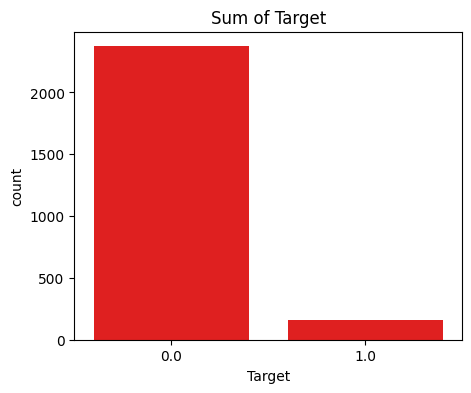

In [206]:
plt.figure(figsize=(5,4))
sns.countplot(data=newdf, x=newdf['Target'], color="red")
plt.title('Sum of Target')
plt.show()

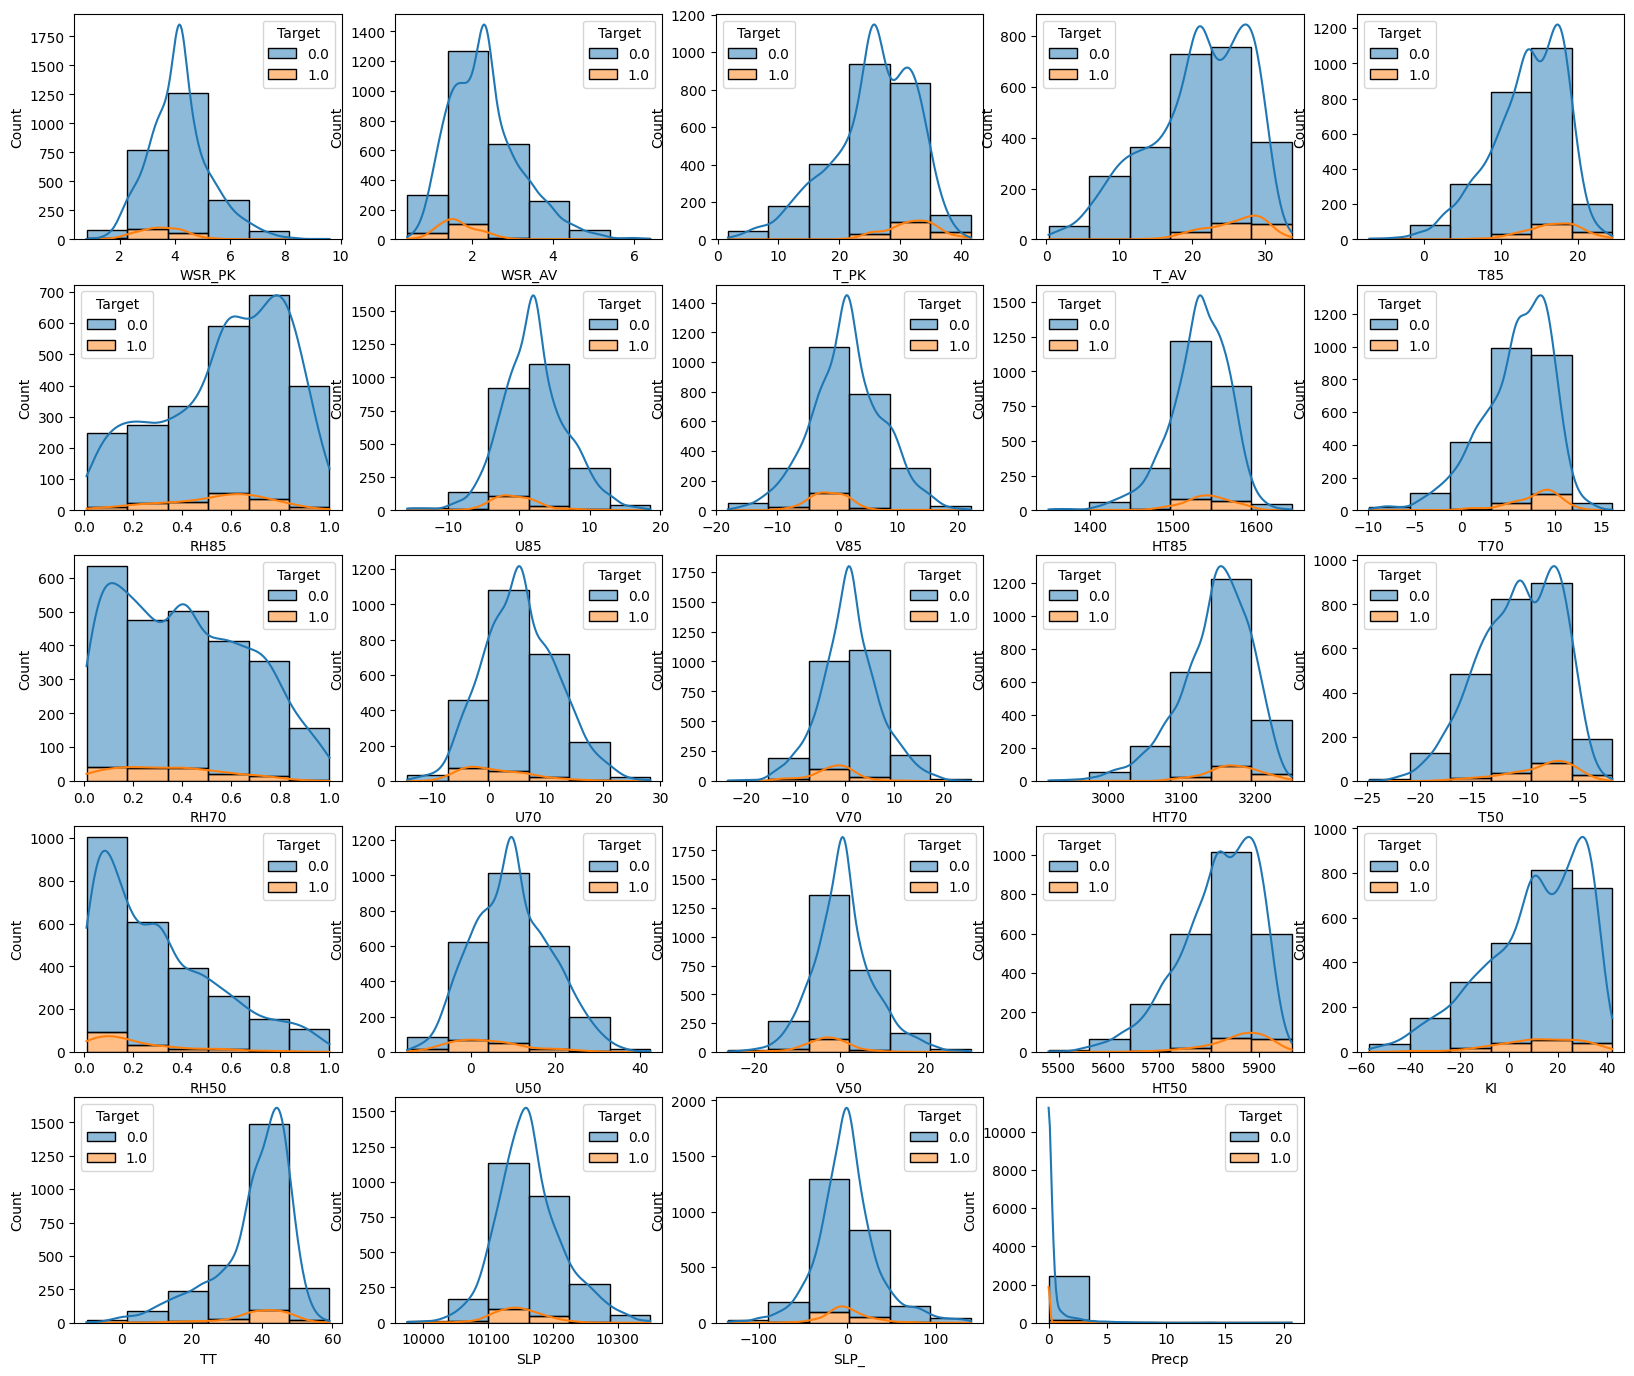

In [207]:
# Plot histogram
newcolumn = newdf.columns
plt.figure(figsize = (20, 17))
for i in range (1, len(newcolumn)-1) :
    plt.subplot(5,5,i)
    sns.histplot(data=newdf, x=newdf[newcolumn[i]],hue="Target", kde=True, bins=6, multiple="stack")

> ##### Multivariate Analysis


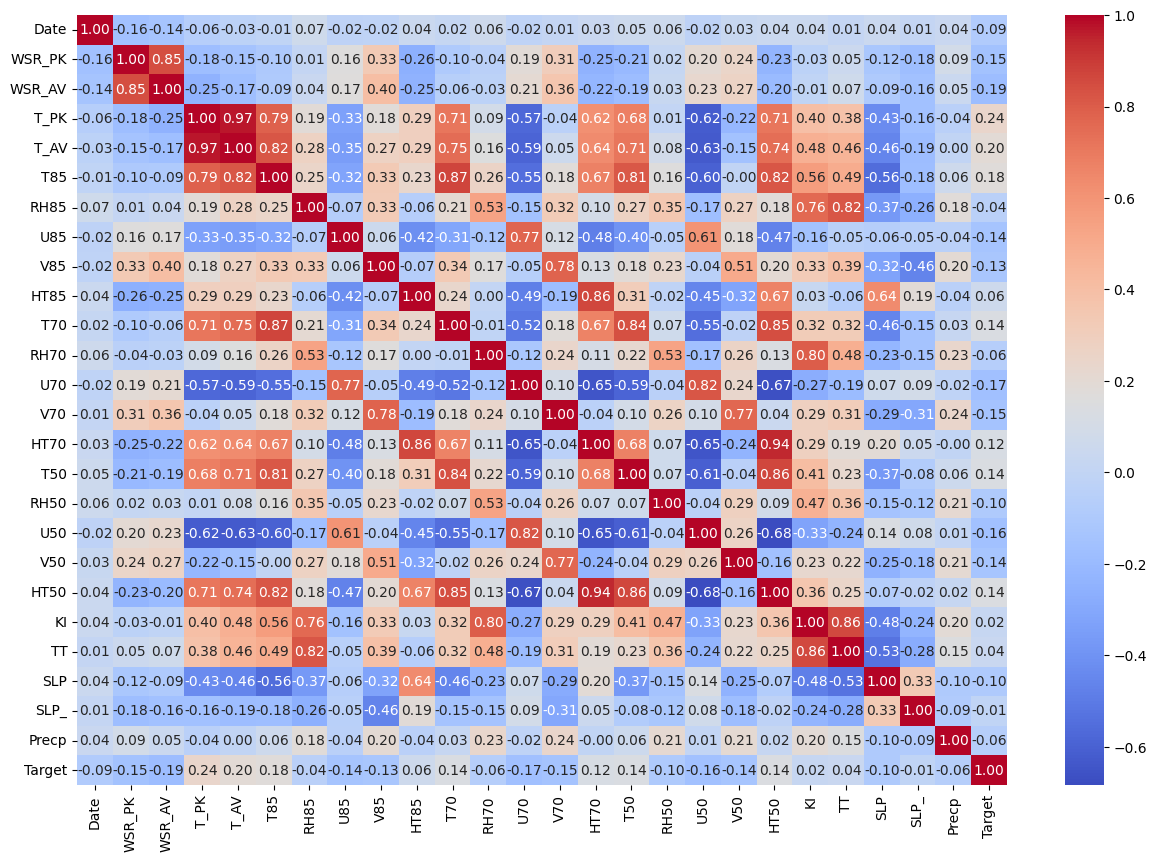

In [208]:
# Plot the correlation matrix 
plt.figure(figsize=(15,10))
sns.heatmap(newdf.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

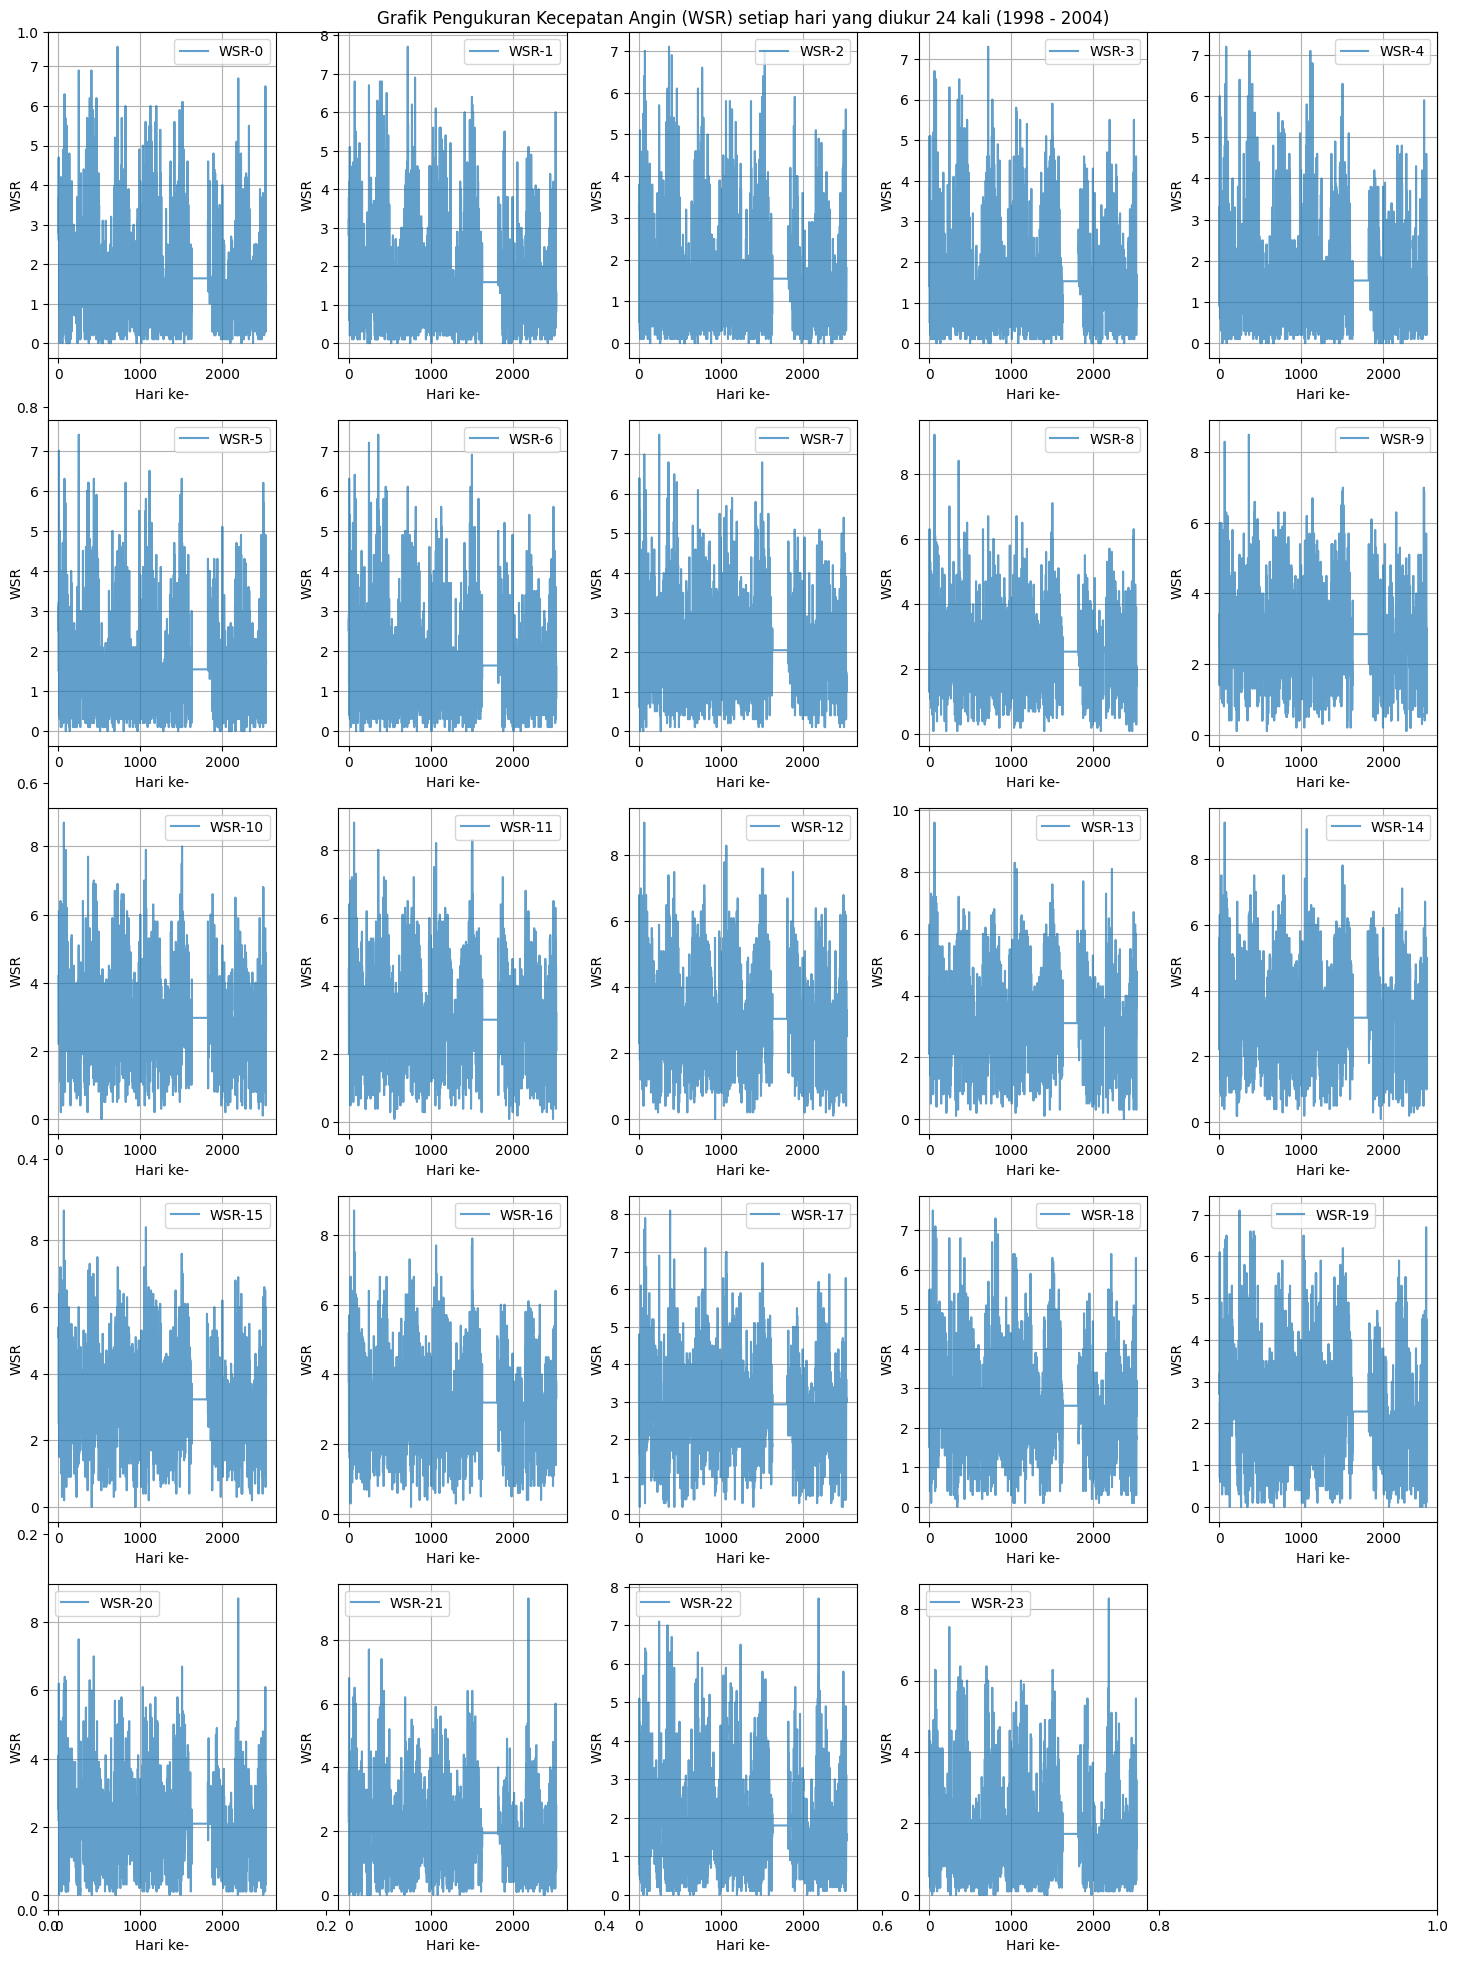

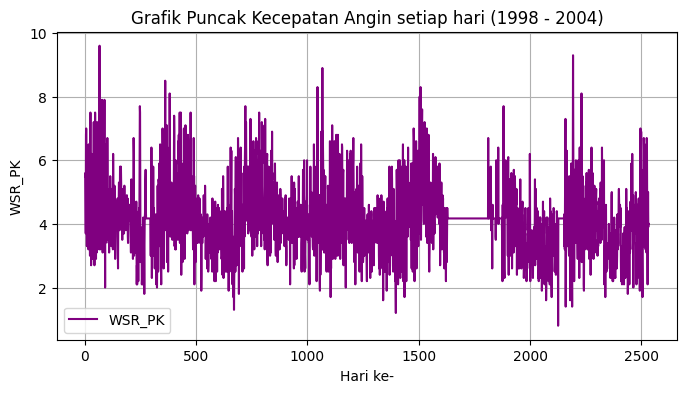

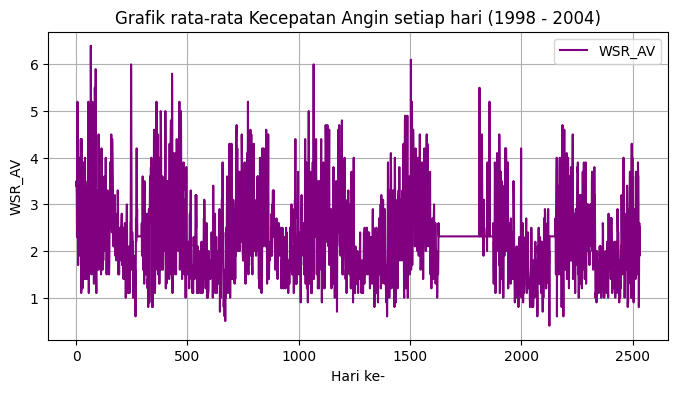

In [209]:
# Tahun diubah ke hari
plt.figure(figsize=(15,20))
plt.title('Grafik Pengukuran Kecepatan Angin (WSR) setiap hari yang diukur 24 kali (1998 - 2004)')
for i in range(0, 24):
    plt.subplot(5,5,i+1)
    plt.plot(df['Date'], df[f'WSR{i}'], label=f'WSR-{i}', alpha=0.7)
    plt.xlabel('Hari ke-')
    plt.ylabel('WSR')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['WSR_PK'], label=f'WSR_PK', color='purple')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_PK')
plt.title('Grafik Puncak Kecepatan Angin setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['WSR_AV'], label=f'WSR_AV', color='purple')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_AV')
plt.title('Grafik rata-rata Kecepatan Angin setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

Pada grafik matplotlib pertama, menunjukkan tiap kecepatan angin yang diukur 24 kali setiap hari dari tahun 1998 sampai 2004. Pada grafik matplotlib kedua, menunjukkan kecepatan angin yang tertinggi/puncak diukur setiap harinya dari tahun 1998 sampai 2004. Pada grafik matplotlib ketiga, menunjukkan kecepatan angin rata-rata, yang diukur 24 kali lalu diambil rata-ratanya setiap harinya dari tahun 1998 sampai 2004.

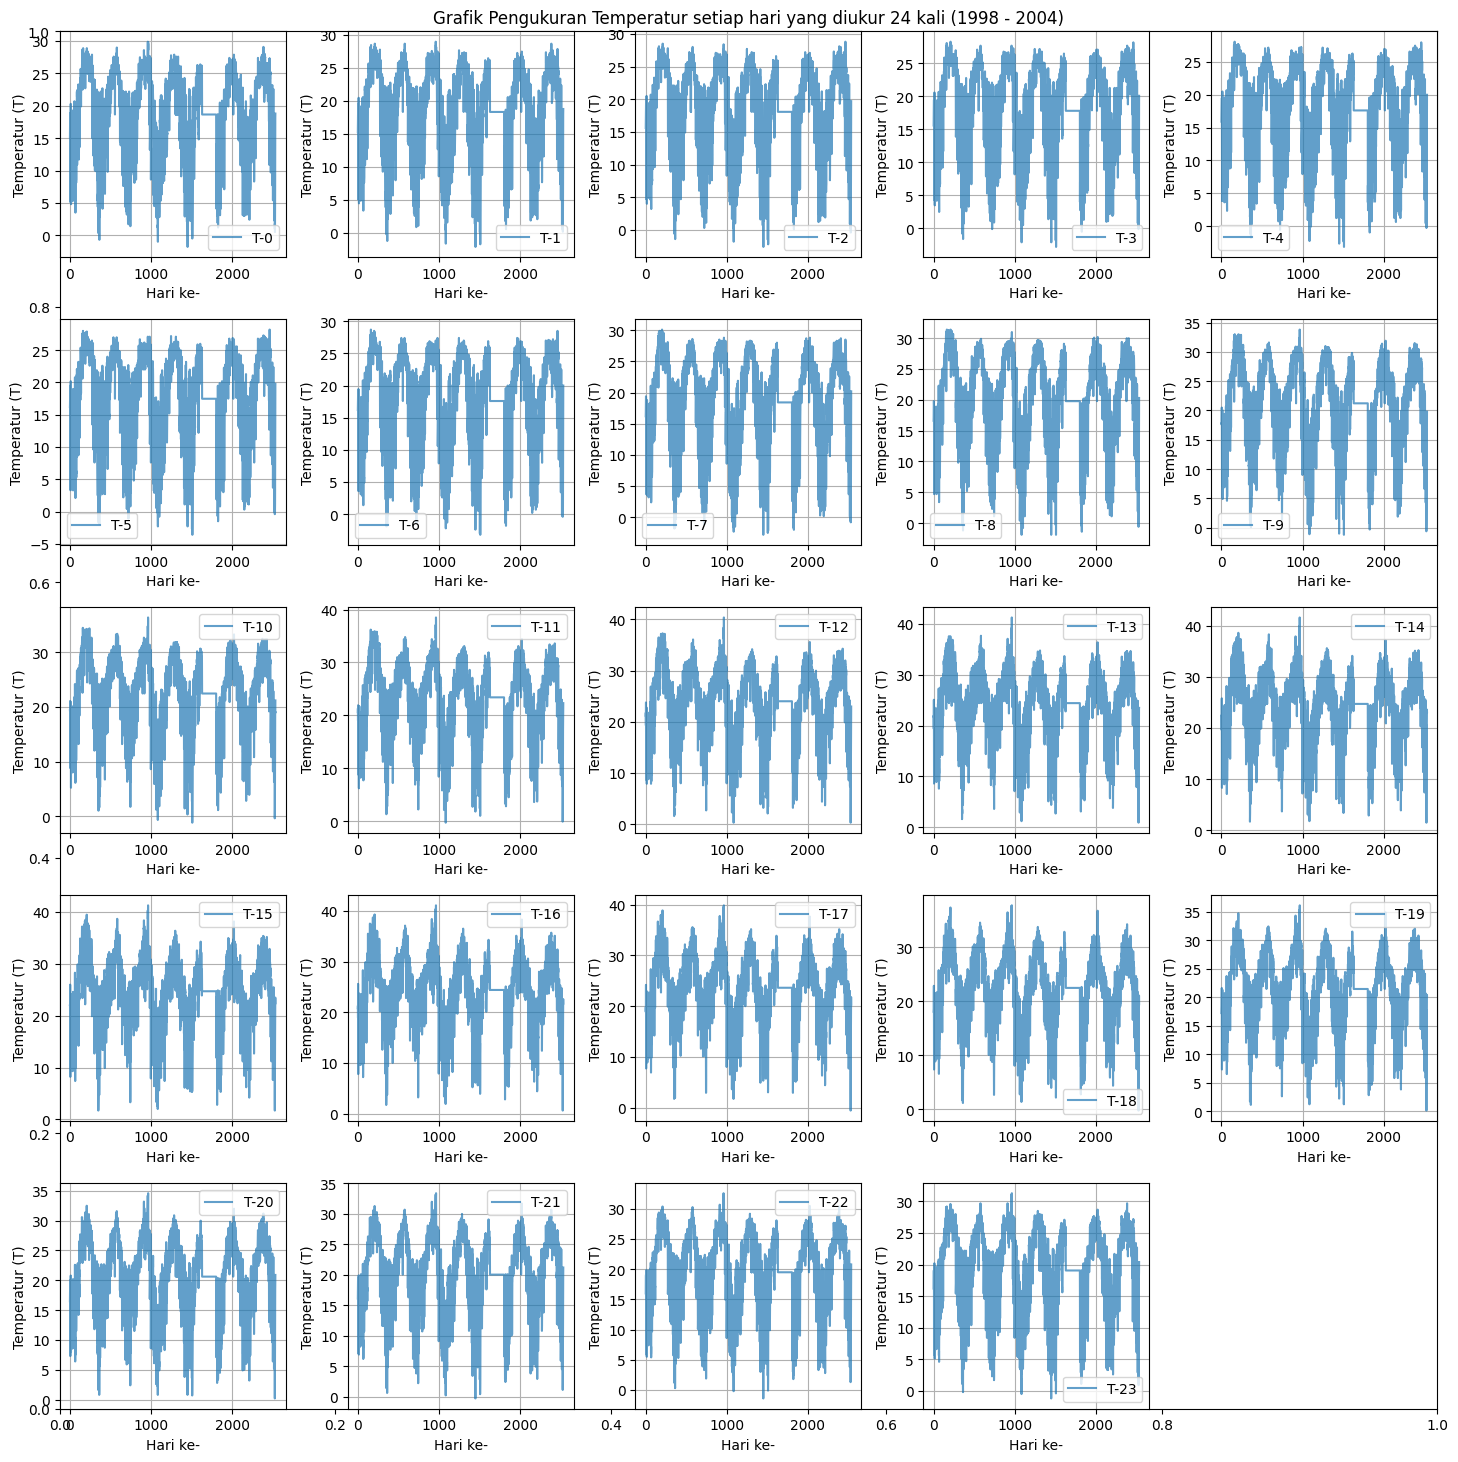

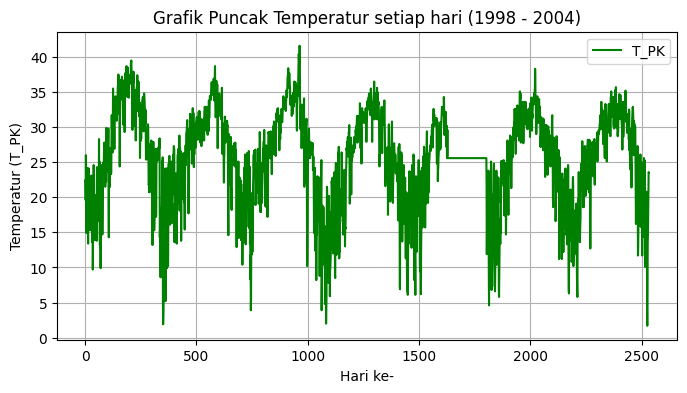

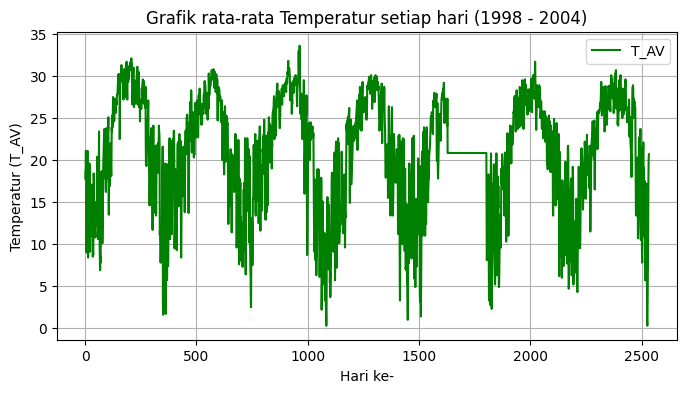

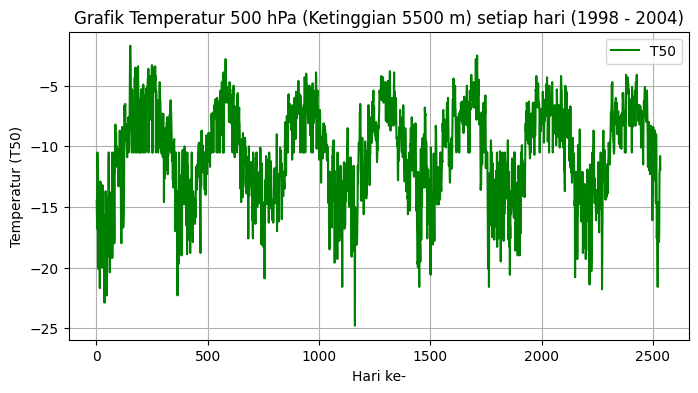

In [210]:
plt.figure(figsize=(15,15))
plt.title('Grafik Pengukuran Temperatur setiap hari yang diukur 24 kali (1998 - 2004)')
for i in range(0, 24):

    plt.subplot(5,5,i+1)
    plt.plot(df['Date'], df[f'T{i}'], label=f'T-{i}', alpha=0.7)
    plt.xlabel('Hari ke-')
    plt.ylabel('Temperatur (T)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['T_PK'], label=f'T_PK', color='green')
plt.xlabel('Hari ke-')
plt.ylabel('Temperatur (T_PK)')
plt.title('Grafik Puncak Temperatur setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['T_AV'], label=f'T_AV', color='green')
plt.xlabel('Hari ke-')
plt.ylabel('Temperatur (T_AV)')
plt.title('Grafik rata-rata Temperatur setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['T50'], label=f'T50', color='green')
plt.xlabel('Hari ke-')
plt.ylabel('Temperatur (T50)')
plt.title('Grafik Temperatur 500 hPa (Ketinggian 5500 m) setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

Pada grafik matplotlib pertama, menunjukkan tiap Temperatur yang diukur 24 kali setiap hari dari tahun 1998 sampai 2004. Pada grafik matplotlib kedua, menunjukkan temperatur yang tertinggi/puncak diukur setiap harinya dari tahun 1998 sampai 2004. Pada grafik matplotlib ketiga, menunjukkan Temperatur rata-rata, yang diukur 24 kali lalu diambil rata-ratanya setiap harinya dari tahun 1998 sampai 2004. Pada grafik matplotlib keempat, merupakan grafik temperatur (T50) pada 500 hPa (hecto Pascal) di ketinggian 5500 meter di atas permukaan laut yang diukur setiap hari dari tahun 1998 sampai 2004. Adanya temperatur (bukan T50) yang dibawah 5 atau 10 derajat disebabkan faktor musim, seperti musim dingin atau salju.

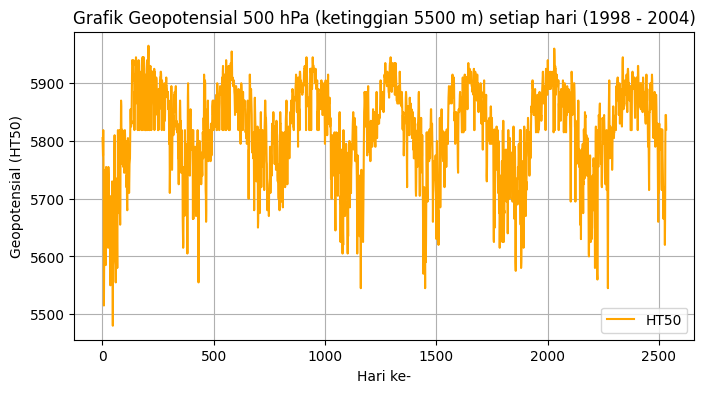

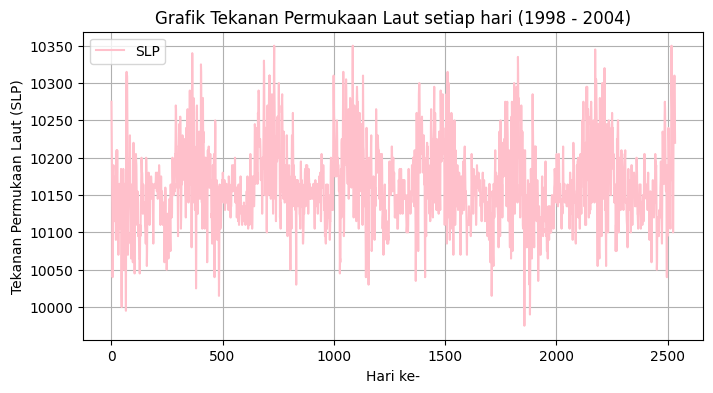

In [211]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['HT50'], label=f'HT50', color='orange')
plt.xlabel('Hari ke-')
plt.ylabel('Geopotensial (HT50)')
plt.title('Grafik Geopotensial 500 hPa (ketinggian 5500 m) setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df['Date'], df['SLP'], label=f'SLP', color='pink')
plt.xlabel('Hari ke-')
plt.ylabel('Tekanan Permukaan Laut (SLP)')
plt.title('Grafik Tekanan Permukaan Laut setiap hari (1998 - 2004)')
plt.legend()
plt.grid(True)
plt.show()

Pada grafik matplotlib pertama, menunjukkan besar nilai Geopotensial pada 500 hecto Pascal (HT50) di ketinggian 5500 meter yang diukur setiap hari dari tahun 1998 sampai 2004. Geopotensial adalah suatu energi potensial yang berkaitan dengan gravitasi bumi dan suatu satuan massa relatif terhadap permukaan laut. Ketinggian geopotensial yaitu ketinggian sebuah permukaan tekanan di atmosfer yang berlokasi di atas permukaan laut. Pada grafik matplotlib kedua, menunjukkan besat tekanan permukaan laut (SLP) yang diukur setiap hari dari tahun 1998 sampai 2004.

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:White;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          text-align:Center;"
          >
      Discret Fourier Transform (FFT) Analysis

### Analisis Transformasi Fourier Diskrit (FFT) tiap fenomena/variabel

#### Kecepatan Angin

Koefisien FFT WSR0 =
[4155.5259624   +0.j          -12.45914367-112.28700736j
   46.07360272-150.82297112j ...  100.52556179+127.3114325j
   46.07360272+150.82297112j  -12.45914367+112.28700736j]
Koefisien FFT WSR0 terbesar = 4155.525962399283
----------------------------------------------------------------------
Koefisien FFT WSR1 =
[ 4.01798679e+03  +0.j         -1.41158573e+00-121.20368622j
  4.45469833e+01-155.66448524j ...  1.09212836e+02+106.33016324j
  4.45469833e+01+155.66448524j -1.41158573e+00+121.20368622j]
Koefisien FFT WSR1 terbesar = 4017.9867916108888
----------------------------------------------------------------------
Koefisien FFT WSR2 =
[3913.98843234  +0.j          -16.29539829-116.26421623j
   68.66288825-146.45487018j ...  134.24173473 +83.46866033j
   68.66288825+146.45487018j  -16.29539829+116.26421623j]
Koefisien FFT WSR2 terbesar = 3913.988432335866
----------------------------------------------------------------------
Koefisien FFT WSR3 =
[3865.73551986  +0.

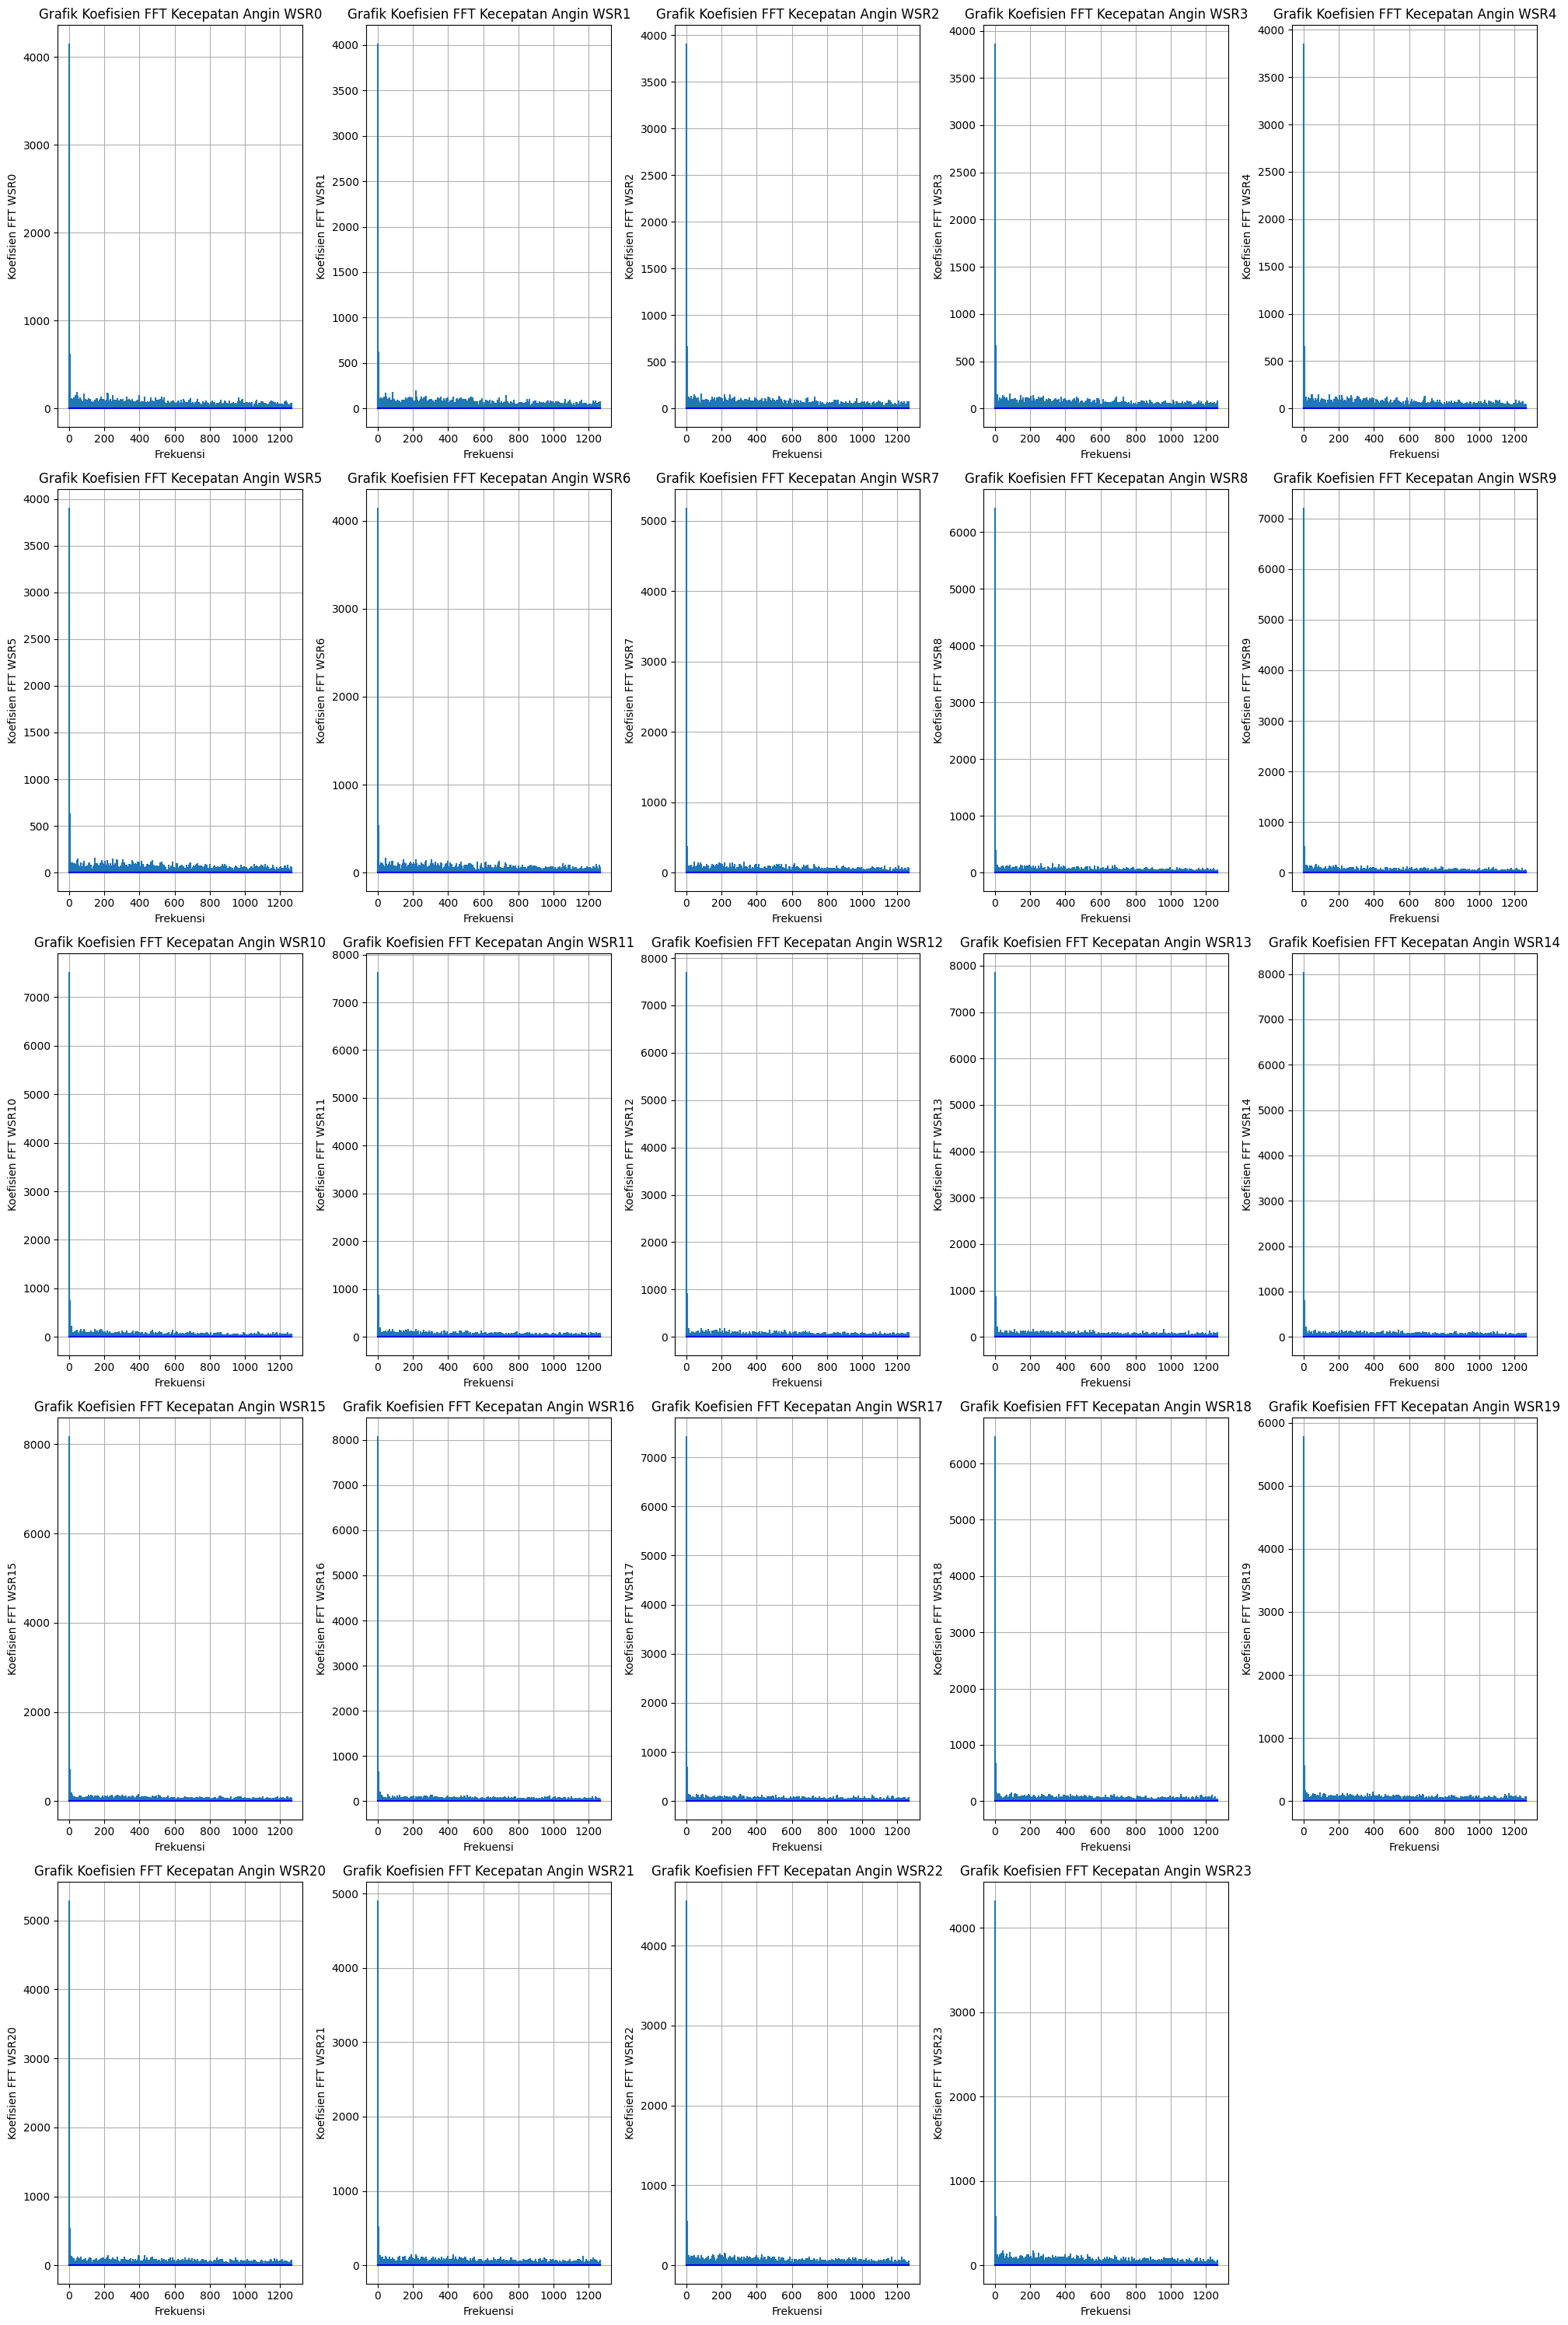

----------------------------------------------------------------------------------------------------
Koefisien FFT Puncak Kecepatan Angin WSR_PK =
[10566.42070796  +0.j           -64.98456953-185.14228632j
    45.92608959-189.69887108j ...   210.02983912 +46.91494294j
    45.92608959+189.69887108j   -64.98456953+185.14228632j]
Koefisien FFT Puncak Kecepatan Angin WSR_PK terbesar = 10566.420707964606


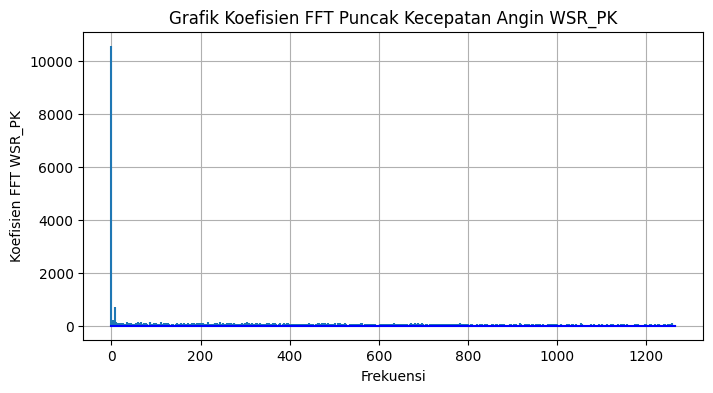

----------------------------------------------------------------------------------------------------
Koefisien FFT rata-rata Kecepatan Angin WSR_AV =
[5862.88628319  +0.j          -36.03419074-107.0495405j
   45.92060885-157.10465778j ...  161.75289498 +60.70336866j
   45.92060885+157.10465778j  -36.03419074+107.0495405j ]
Koefisien FFT rata-rata Kecepatan Angin WSR_AV terbesar = 5862.8862831858405


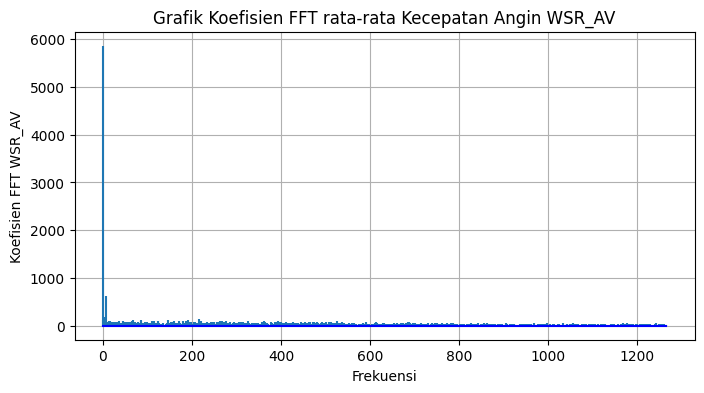

In [212]:
N = len(df['Date'])

plt.figure(figsize=(20, 30))

for i in range(0, 24):
    Xk_WSR = np.fft.fft(df[f'WSR{i}'])
    freq = np.fft.fftfreq(N, 1/N)[:N//2]
    
    print(f'Koefisien FFT WSR{i} =')
    print(Xk_WSR)
    print(f'Koefisien FFT WSR{i} terbesar =',max(np.real(Xk_WSR)))
    print('-'*70)

    plt.subplot(5, 5, i+1)
    plt.stem(freq, abs(Xk_WSR[:N//2]), markerfmt='', basefmt='b')
    plt.xlabel('Frekuensi')
    plt.ylabel(f'Koefisien FFT WSR{i}')
    plt.title(f'Grafik Koefisien FFT Kecepatan Angin WSR{i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

print('-'*100)
Xk_WSR_PK = np.fft.fft(df['WSR_PK'])
freq_WSR_PK = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT Puncak Kecepatan Angin WSR_PK =')
print(Xk_WSR_PK)
print('Koefisien FFT Puncak Kecepatan Angin WSR_PK terbesar =',max(np.real(Xk_WSR_PK)))
plt.figure(figsize=(8,4))
plt.stem(freq_WSR_PK, abs(Xk_WSR_PK[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT WSR_PK')
plt.title(f'Grafik Koefisien FFT Puncak Kecepatan Angin WSR_PK')
plt.grid(True)
plt.show()

print('-'*100)
Xk_WSR_AV = np.fft.fft(df['WSR_AV'])
freq_WSR_AV = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT rata-rata Kecepatan Angin WSR_AV =')
print(Xk_WSR_AV)
print('Koefisien FFT rata-rata Kecepatan Angin WSR_AV terbesar =',max(np.real(Xk_WSR_AV)))
plt.figure(figsize=(8,4))
plt.stem(freq_WSR_AV, abs(Xk_WSR_AV[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT WSR_AV')
plt.title(f'Grafik Koefisien FFT rata-rata Kecepatan Angin WSR_AV')
plt.grid(True)
plt.show()

Didapatkan hasil koefisien Fourier dari hasil Komputasi FFT tiap kecepatan angin yang diukur setiap hari dari tahun 1998 sampai 2004. <pr>
- Pada grafik matplotlib pertama menunjukkan grafik koefisien Fourier tiap kecepatan angin WSR beserta nilai Koefisien Fourier terbesarnya. <pr>
- Pada grafik kedua menunjukkan grafik koefisien Fourier kecepatan angin tertinggi/puncak $(WSR_{PK})$ tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $\text{Max}\space X_{k_{\text{WSRPK}}} = 10566.420707964606 $. <pr>
- Pada grafik ketiga menunjukkan grafik koefisien Fourier kecepatan angin rata-rata $(WSR_{AV})$ tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $ \text{Max}\space X_{k_{\text{WSRAV}}} = 5862.8862831858405 $. <pr>

#### Temperatur

Koefisien FFT T0 =
[47253.15283824  +0.j           879.61471818-611.59902616j
  -130.65514894+114.33866226j ...   -54.88113082+177.53432957j
  -130.65514894-114.33866226j   879.61471818+611.59902616j]
Koefisien FFT T0 terbesar = 47253.15283824158
----------------------------------------------------------------------
Koefisien FFT T1 =
[ 4.64883173e+04  +0.j          9.14167001e+02-557.32866172j
 -4.29210017e+01+106.0044208j  ... -9.93949868e+01+183.3657855j
 -4.29210017e+01-106.0044208j   9.14167001e+02+557.32866172j]
Koefisien FFT T1 terbesar = 46488.317291311745
----------------------------------------------------------------------
Koefisien FFT T2 =
[ 4.57611391e+04  +0.j          9.60324617e+02-521.89548574j
 -9.57994608e-01+118.73040827j ... -7.87504981e+01+198.3229318j
 -9.57994608e-01-118.73040827j  9.60324617e+02+521.89548574j]
Koefisien FFT T2 terbesar = 45761.13913043479
----------------------------------------------------------------------
Koefisien FFT T3 =
[ 4.51540409e+04

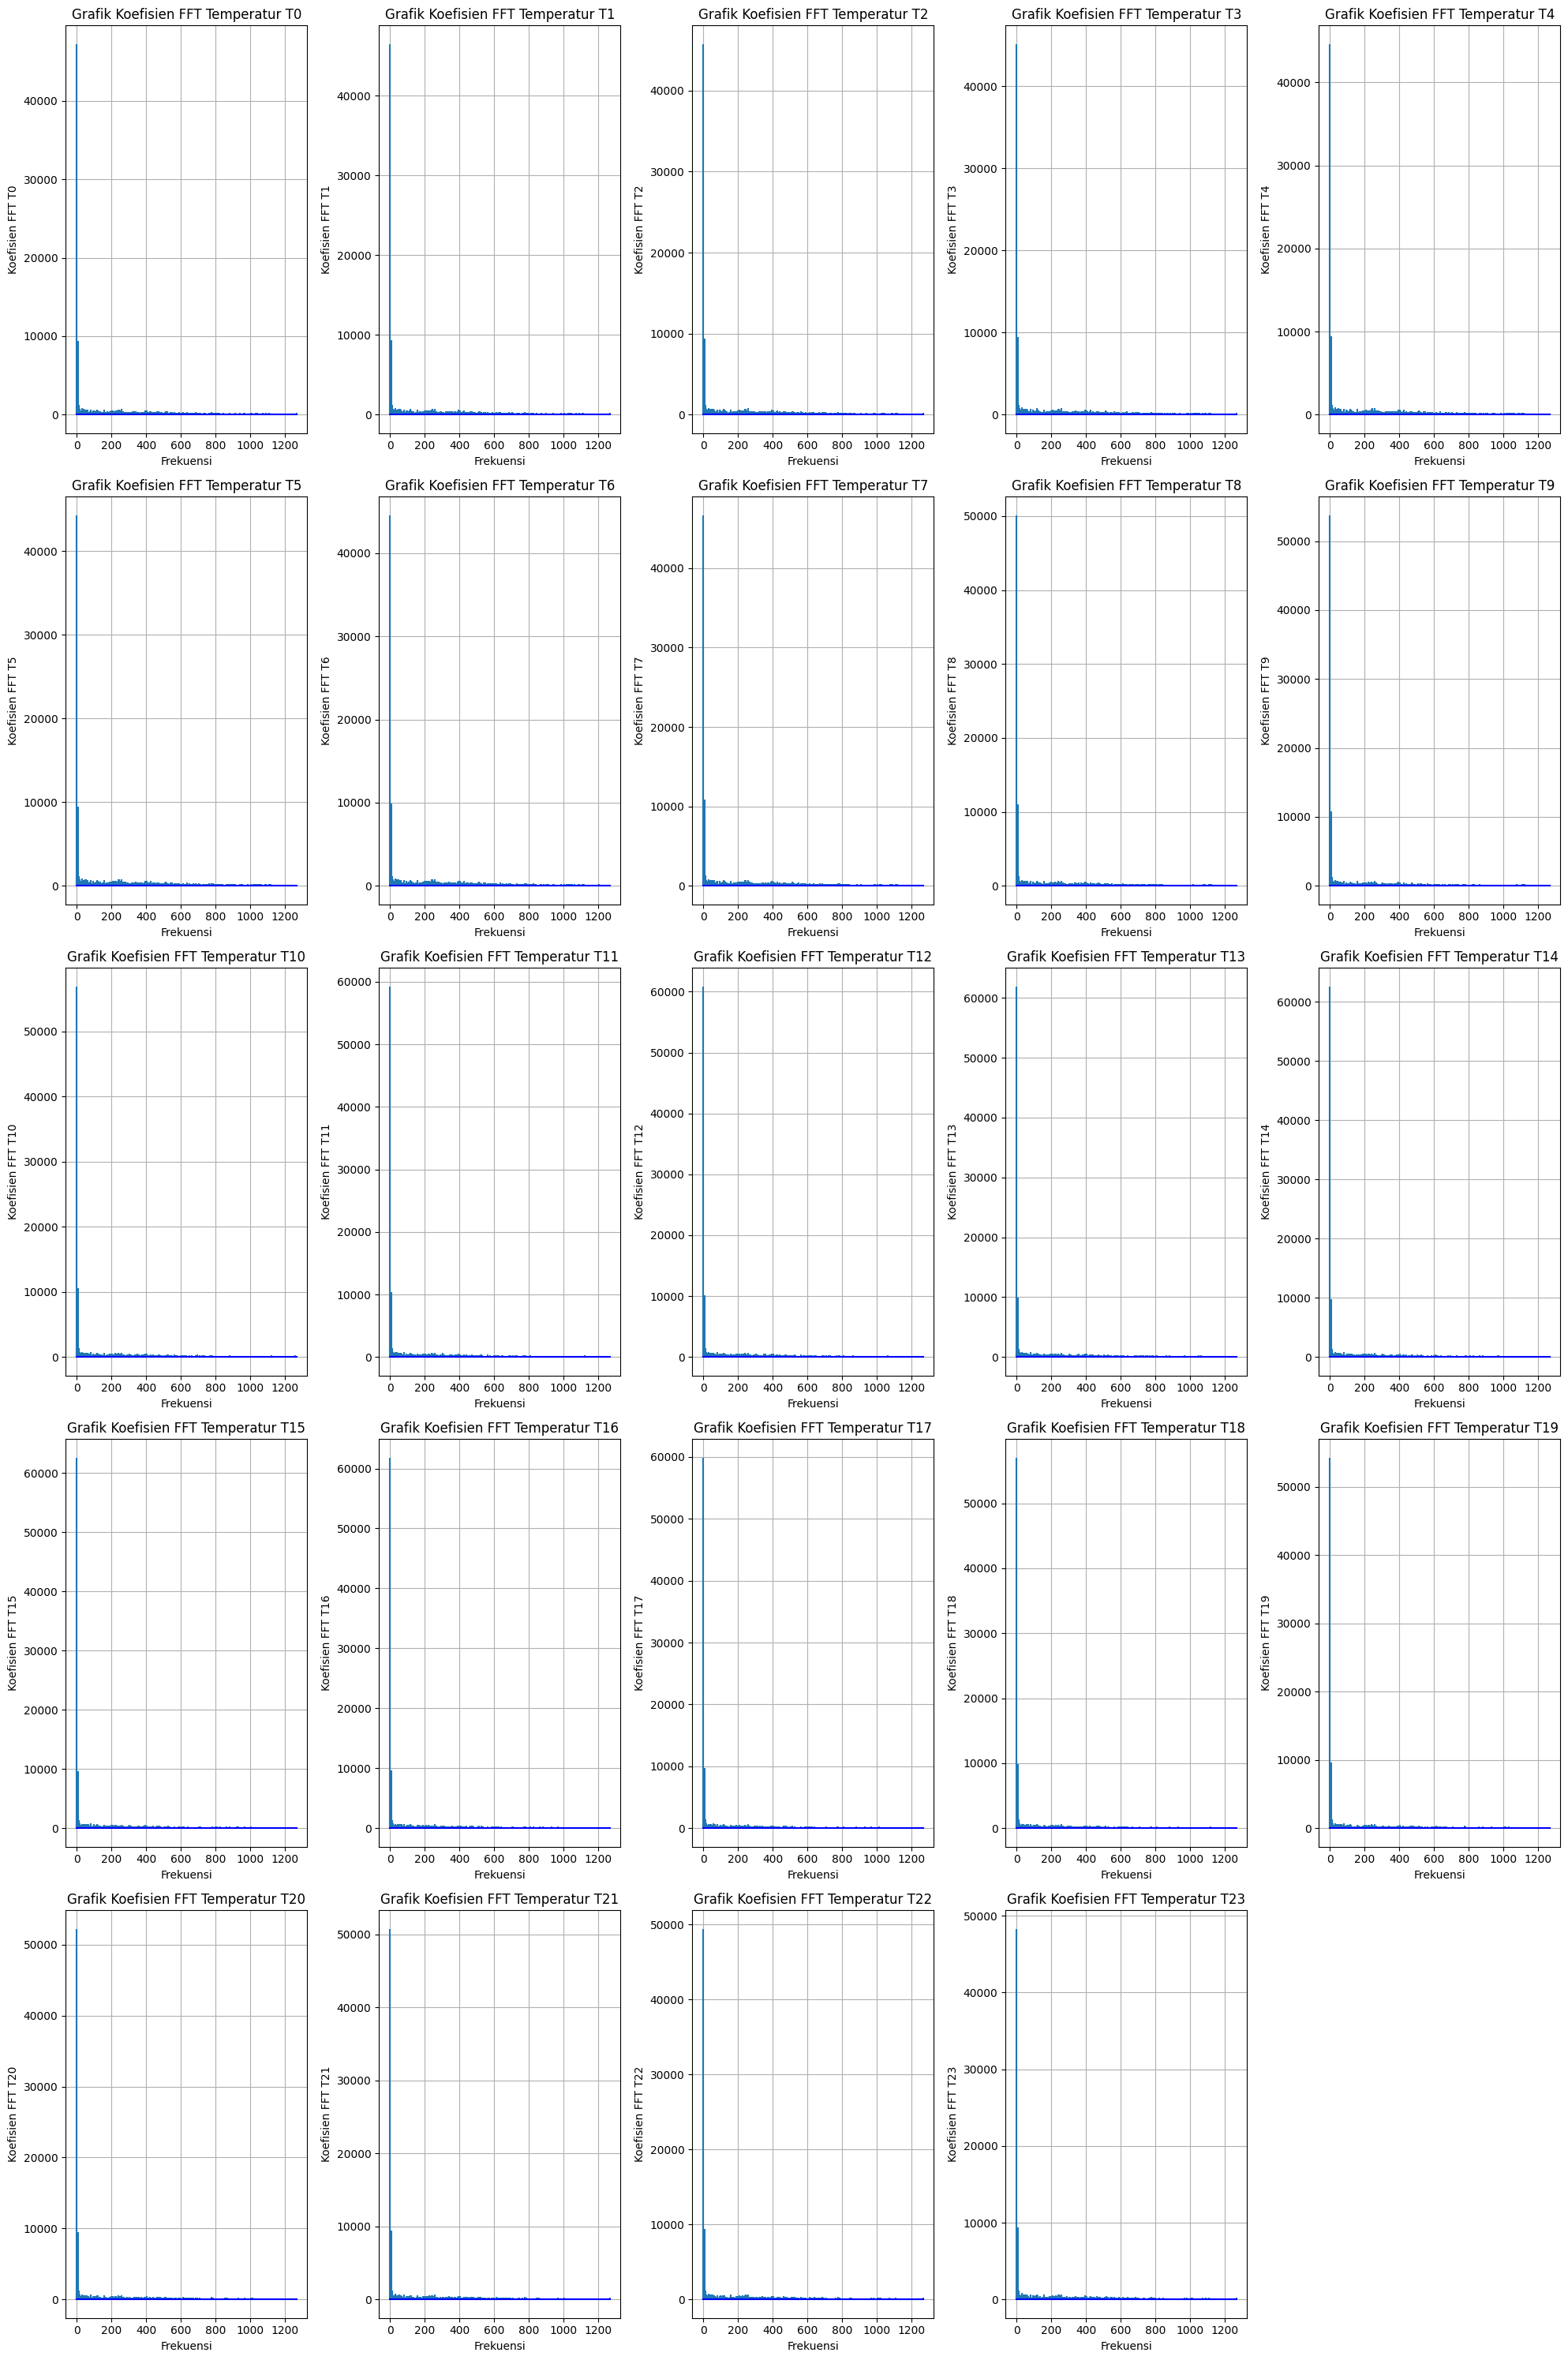

----------------------------------------------------------------------------------------------------
Koefisien FFT Temperatur T_PK =
[ 6.47968900e+04   +0.j          9.11417025e+02-1095.52218779j
 -3.38786487e+02 -128.82715009j ... -5.95228130e+01 +209.08039617j
 -3.38786487e+02 +128.82715009j  9.11417025e+02+1095.52218779j]
Koefisien FFT Temperatur T_PK terbesar = 64796.88999151825


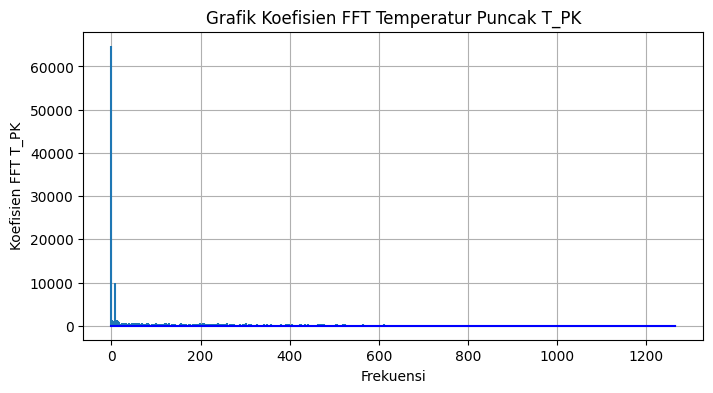

----------------------------------------------------------------------------------------------------
Koefisien FFT Temperatur T_AV =
[52797.90356234  +0.j           898.04212533-793.49801914j
  -182.79406659 +23.77733962j ...  -105.13091698+209.42016521j
  -182.79406659 -23.77733962j   898.04212533+793.49801914j]
Koefisien FFT Temperatur T_AV terbesar = 52797.90356234097


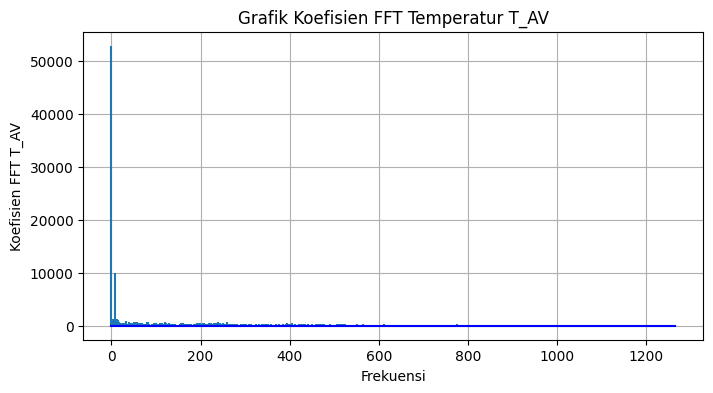

----------------------------------------------------------------------------------------------------
Koefisien FFT Temperatur T50 =
[-26620.17485525  +0.j             71.3702109  -26.14800987j
    -28.56320262-168.38159821j ...   -138.38867971+124.60087669j
    -28.56320262+168.38159821j     71.3702109  +26.14800987j]
Koefisien FFT Temperatur T50 terbesar = 26620.174855252273


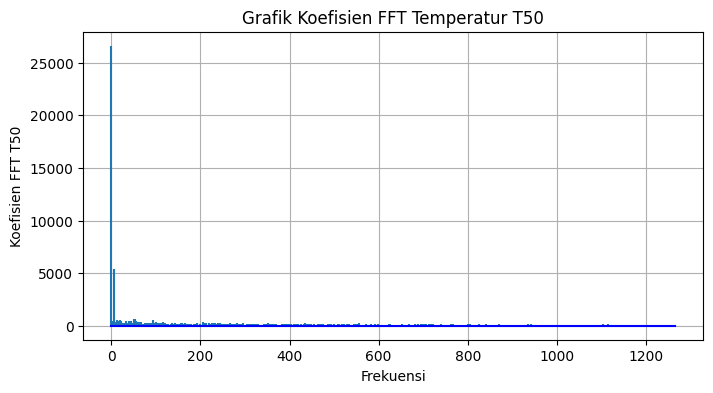

In [213]:
N = len(df['Date'])

plt.figure(figsize=(20, 30))

for i in range(0, 24):
    Xk_T = np.fft.fft(df[f'T{i}'])
    freq = np.fft.fftfreq(N, 1/N)[:N//2]
    
    print(f'Koefisien FFT T{i} =')
    print(Xk_T)
    print(f'Koefisien FFT T{i} terbesar =', max(np.real(Xk_T)))
    print('-'*70)

    plt.subplot(5, 5, i+1)
    plt.stem(freq, abs(Xk_T[:N//2]), markerfmt='', basefmt='b')
    plt.xlabel('Frekuensi')
    plt.ylabel(f'Koefisien FFT T{i}')
    plt.title(f'Grafik Koefisien FFT Temperatur T{i}')
    plt.grid(True)

plt.tight_layout()
plt.show()

print('-'*100)
Xk_T_PK = np.fft.fft(df['T_PK'])
freq_T_PK = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT Temperatur T_PK =')
print(Xk_T_PK)
print('Koefisien FFT Temperatur T_PK terbesar =', max(np.real(Xk_T_PK)))
plt.figure(figsize=(8,4))
plt.stem(freq_T_PK, abs(Xk_T_PK[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT T_PK')
plt.title(f'Grafik Koefisien FFT Temperatur Puncak T_PK')
plt.grid(True)
plt.show()

print('-'*100)
Xk_T_AV = np.fft.fft(df['T_AV'])
freq_T_AV = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT Temperatur T_AV =')
print(Xk_T_AV)
print('Koefisien FFT Temperatur T_AV terbesar =', max(np.real(Xk_T_AV)))
plt.figure(figsize=(8,4))
plt.stem(freq_T_AV, abs(Xk_T_AV[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT T_AV')
plt.title(f'Grafik Koefisien FFT Temperatur T_AV')
plt.grid(True)
plt.show()

print('-'*100)
Xk_T50 = np.fft.fft(df['T50'])
freq_t50 = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT Temperatur T50 =')
print(Xk_T50)
print('Koefisien FFT Temperatur T50 terbesar =', max(np.real(abs(Xk_T50))))
plt.figure(figsize=(8,4))
plt.stem(freq_t50, abs(Xk_T50[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT T50')
plt.title(f'Grafik Koefisien FFT Temperatur T50')
plt.grid(True)
plt.show()

Didapatkan hasil koefisien Fourier dari hasil Komputasi FFT tiap Temperatur yang diukur setiap hari dari tahun 1998 sampai 2004. <pr>
- Pada grafik matplotlib pertama menunjukkan grafik koefisien Fourier tiap Temperatur $T$ beserta nilai Koefisien Fourier terbesarnya. <pr>
- Pada grafik kedua menunjukkan grafik koefisien Fourier Temperatur tertinggi/puncak ($T_{PK}$) tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $\text{Max}\space X_{k_{\text{TPK}}} = 64796.88999151825 $. <pr>
- Pada grafik ketiga menunjukkan grafik koefisien Fourier Temperatur rata-rata ($T_{AV}$) tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $ \text{Max}\space X_{k_{\text{TAV}}} = 52797.90356234097 $. <pr>
- Pada grafik keempat menunjukkan grafik koefisien Fourier Temperatur pada ketinggian 5500m dengan tekanan 500 hPa ($T_{50}$) tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $ \text{Max}\space X_{k_{\text{T50}}} = 26620.174855252273 $. <pr>

#### Geopotensial dan Tekanan Permukaan Laut

Koefisien FFT Geopotensial 500 hPa HT50 =
[ 1.47390991e+07   +0.j         -1.13673718e+03-7761.31020932j
 -4.08481799e+03 +202.28762727j ... -6.25517046e+03-4192.90065243j
 -4.08481799e+03 -202.28762727j -1.13673718e+03+7761.31020932j]
Koefisien FFT Geopotensial 500 hPa HT50 terbesar = 14739099.078893023


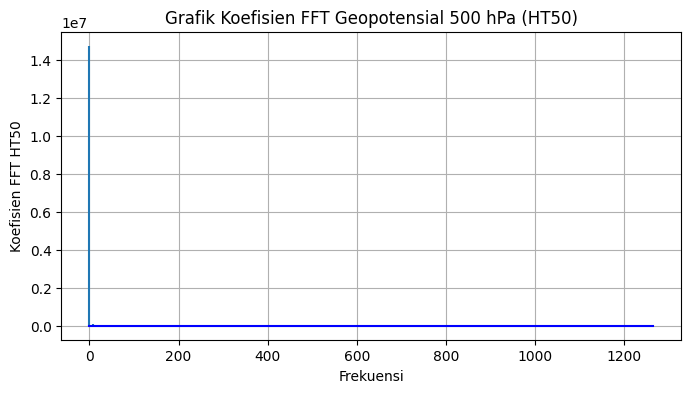

----------------------------------------------------------------------------------------------------
Koefisien FFT SLP =
[ 2.57457424e+07   +0.j         -7.59486075e+03-3664.43918377j
 -1.41246811e+03+6510.63009497j ... -5.40863498e+03-6883.36209401j
 -1.41246811e+03-6510.63009497j -7.59486075e+03+3664.43918377j]
Koefisien FFT SLP terbesar = 25745742.391304336


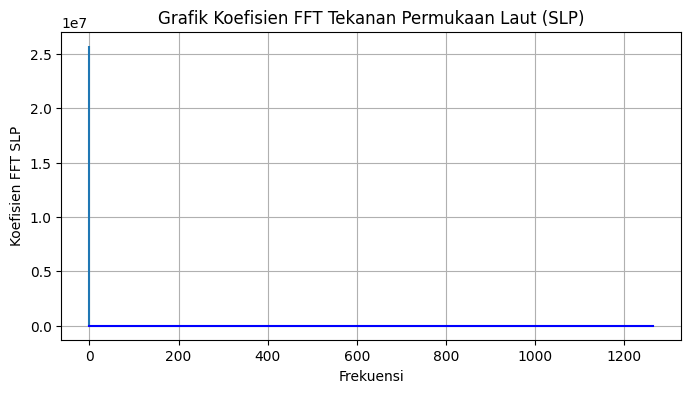

In [214]:
N = len(df['Date'])

Xk_HT50 = np.fft.fft(df['HT50'])
freq_HT50 = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT Geopotensial 500 hPa HT50 =')
print(Xk_HT50)
print('Koefisien FFT Geopotensial 500 hPa HT50 terbesar =',max(np.real(Xk_HT50)))
plt.figure(figsize=(8,4))
plt.stem(freq_HT50, abs(Xk_HT50[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT HT50')
plt.title(f'Grafik Koefisien FFT Geopotensial 500 hPa (HT50)')
plt.grid(True)
plt.show()

print('-'*100)

Xk_slp = np.fft.fft(df['SLP'])
freq_slp = np.fft.fftfreq(N, 1/N)[:N//2]
print('Koefisien FFT SLP =')
print(Xk_slp)
print('Koefisien FFT SLP terbesar =',max(np.real(Xk_slp)))
plt.figure(figsize=(8,4))
plt.stem(freq_slp, abs(Xk_slp[:N//2]), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT SLP')
plt.title(f'Grafik Koefisien FFT Tekanan Permukaan Laut (SLP)')
plt.grid(True)
plt.show()

Didapatkan hasil koefisien Fourier dari hasil Komputasi FFT tiap Geopotensial dan SLP yang diukur setiap hari dari tahun 1998 sampai 2004. <pr>>
- Pada grafik pertama menunjukkan grafik koefisien Fourier Geopotensial ($HT_{50}$) tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $\text{Max}\space X_{k_{\text{HT50}}} = 14739099.078893023 $. <pr>
- Pada grafik kedua menunjukkan grafik koefisien Fourier Tekanan Permukaan Laut ($SLP$) tiap-tiap hari yang diukur dari tahun 1998 sampai 2004, serta didapatkan koefisien Fourier maksimum sebesar $ \text{Max}\space X_{k_{\text{SLP}}} = 25745742.391304336 $. <pr>

### Metode Filtering Frekuensi FFT

c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\muham\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


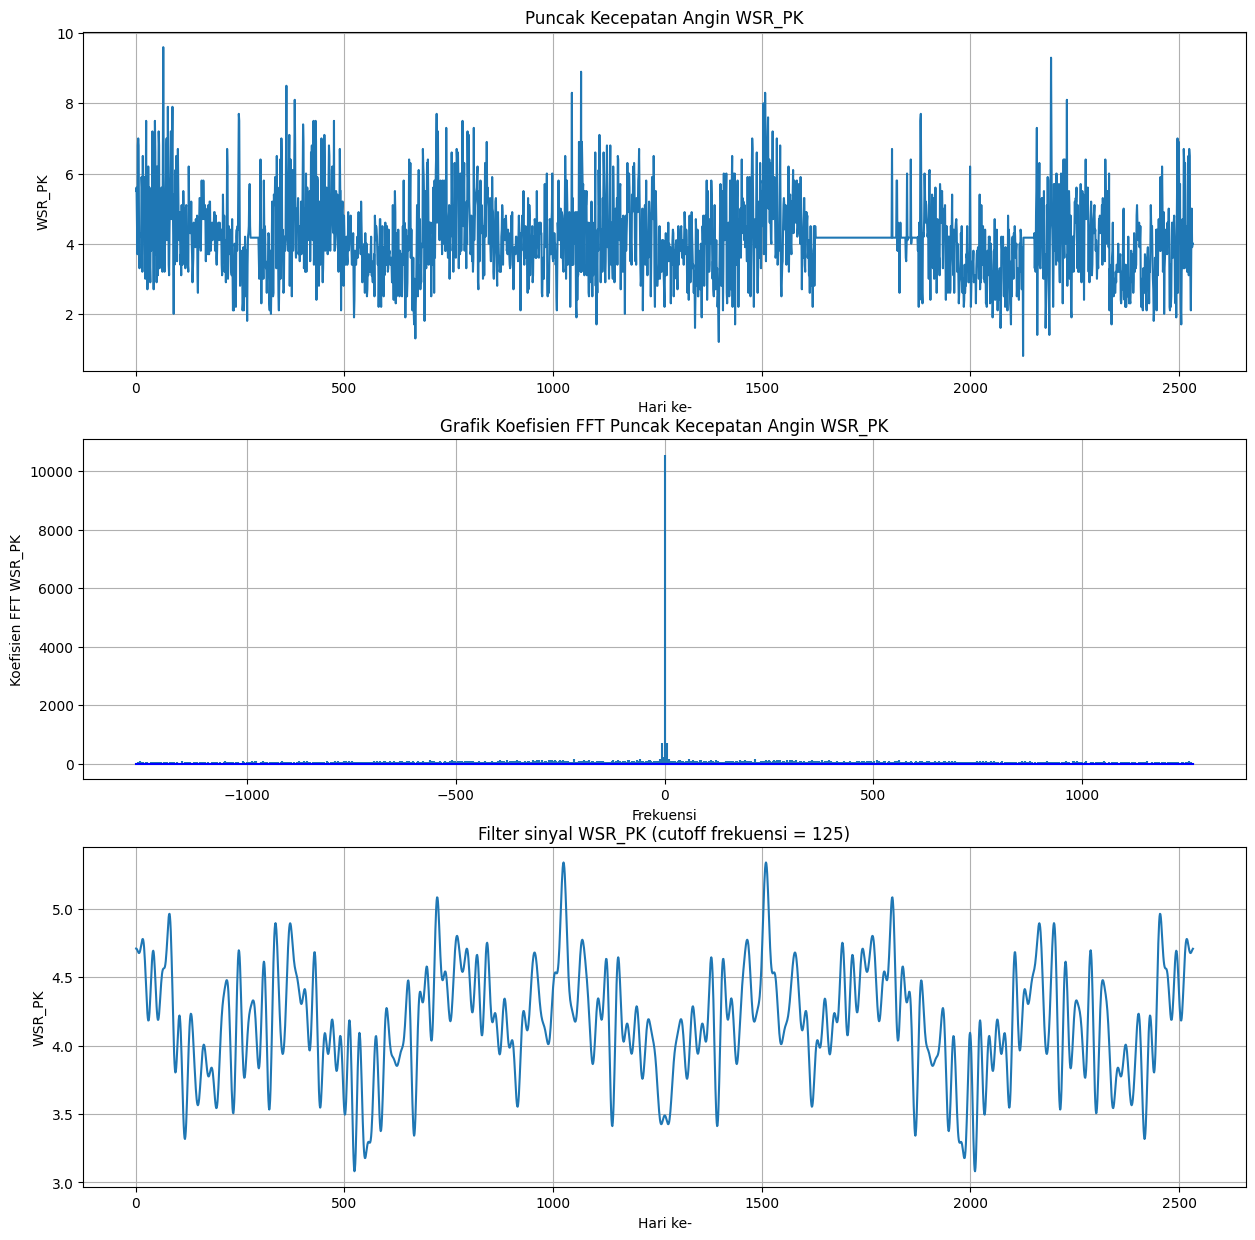

In [215]:
N = len(df['Date'])

Xk_WSR_PK = np.fft.fft(df['WSR_PK'])
freq_WSR_PK = np.fft.fftfreq(N, 1/N)
cutoff_freq = 125
low_pass_filter = np.ones_like(freq_WSR_PK)
low_pass_filter[np.abs(freq_WSR_PK) > cutoff_freq] = 0
filter_dft_WSR_PK = np.real(Xk_WSR_PK) * low_pass_filter
filter_sinyal_WSR_PK = np.fft.ifft(filter_dft_WSR_PK)

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(df['Date'], df['WSR_PK'])
plt.title('Puncak Kecepatan Angin WSR_PK')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_PK')
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(freq_WSR_PK, abs(Xk_WSR_PK), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT WSR_PK')
plt.title(f'Grafik Koefisien FFT Puncak Kecepatan Angin WSR_PK')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['Date'], filter_sinyal_WSR_PK)
plt.title(f'Filter sinyal WSR_PK (cutoff frekuensi = {cutoff_freq})')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_PK')
plt.grid(True)

plt.show()

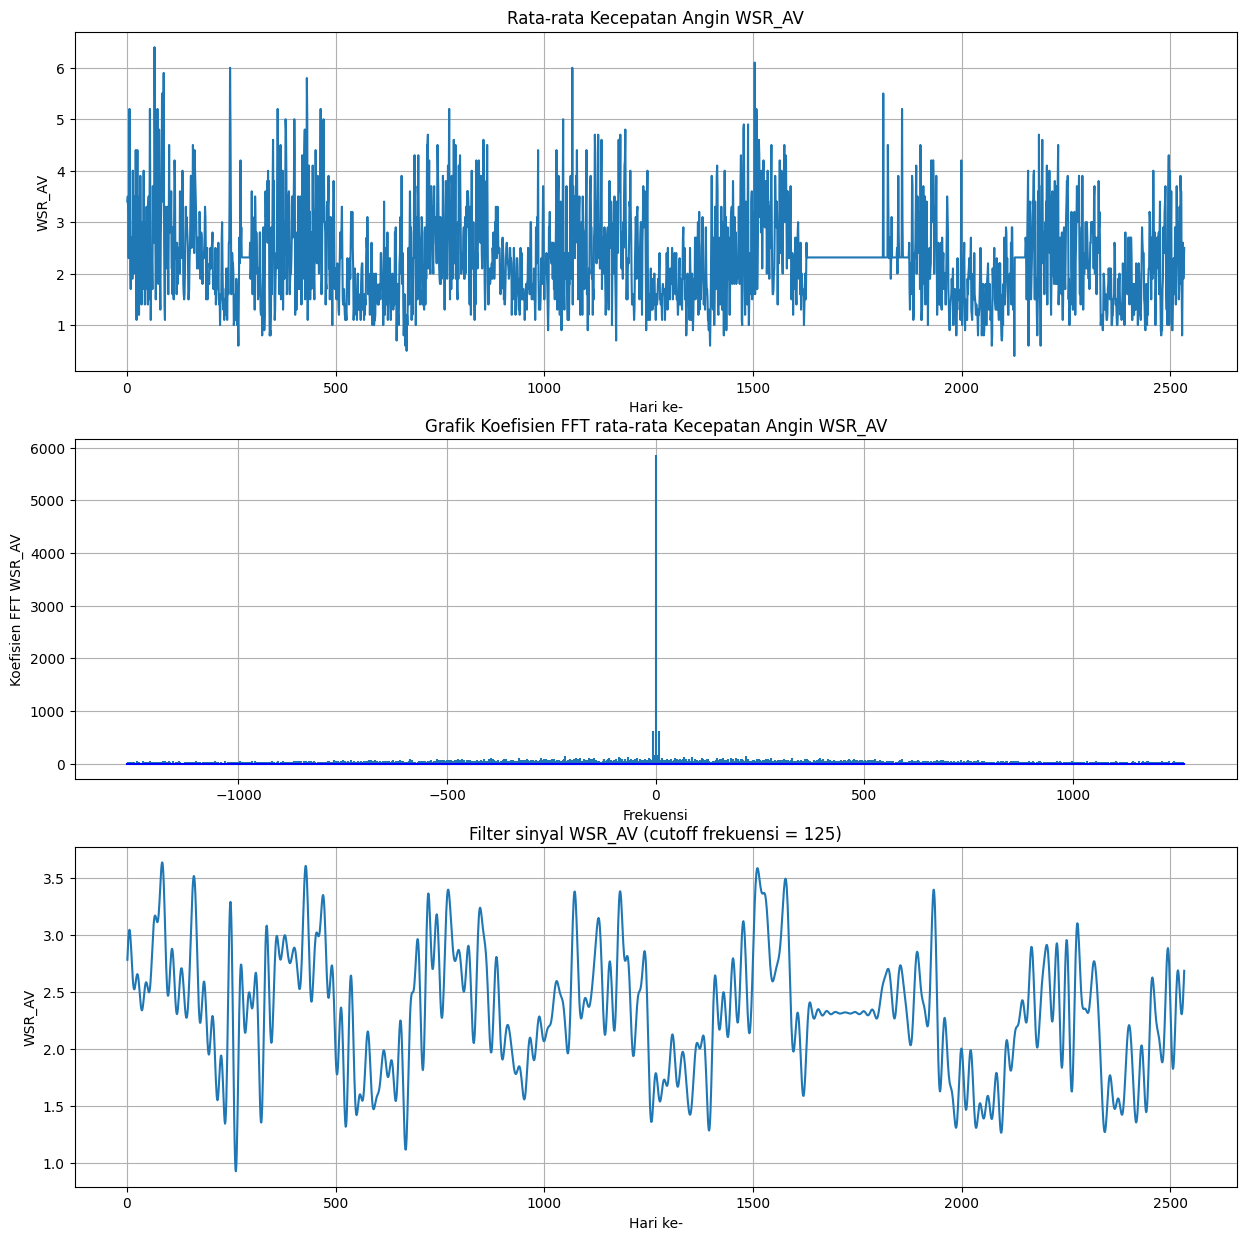

In [216]:
N = len(df['Date'])

Xk_WSR_AV = np.fft.fft(df['WSR_AV'])
freq_WSR_AV = np.fft.fftfreq(N, 1/N)
cutoff_freq = 125
low_pass_filter = np.ones_like(freq_WSR_AV)
low_pass_filter[np.abs(freq_WSR_AV) > cutoff_freq] = 0
filter_dft_WSR_AV = Xk_WSR_AV * low_pass_filter
filter_sinyal_WSR_AV = np.fft.ifft(filter_dft_WSR_AV)

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(df['Date'], df['WSR_AV'])
plt.title('Rata-rata Kecepatan Angin WSR_AV')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_AV')
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(freq_WSR_AV, abs(Xk_WSR_AV), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT WSR_AV')
plt.title(f'Grafik Koefisien FFT rata-rata Kecepatan Angin WSR_AV')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['Date'], filter_sinyal_WSR_AV)
plt.title(f'Filter sinyal WSR_AV (cutoff frekuensi = {cutoff_freq})')
plt.xlabel('Hari ke-')
plt.ylabel('WSR_AV')
plt.grid(True)

plt.show()

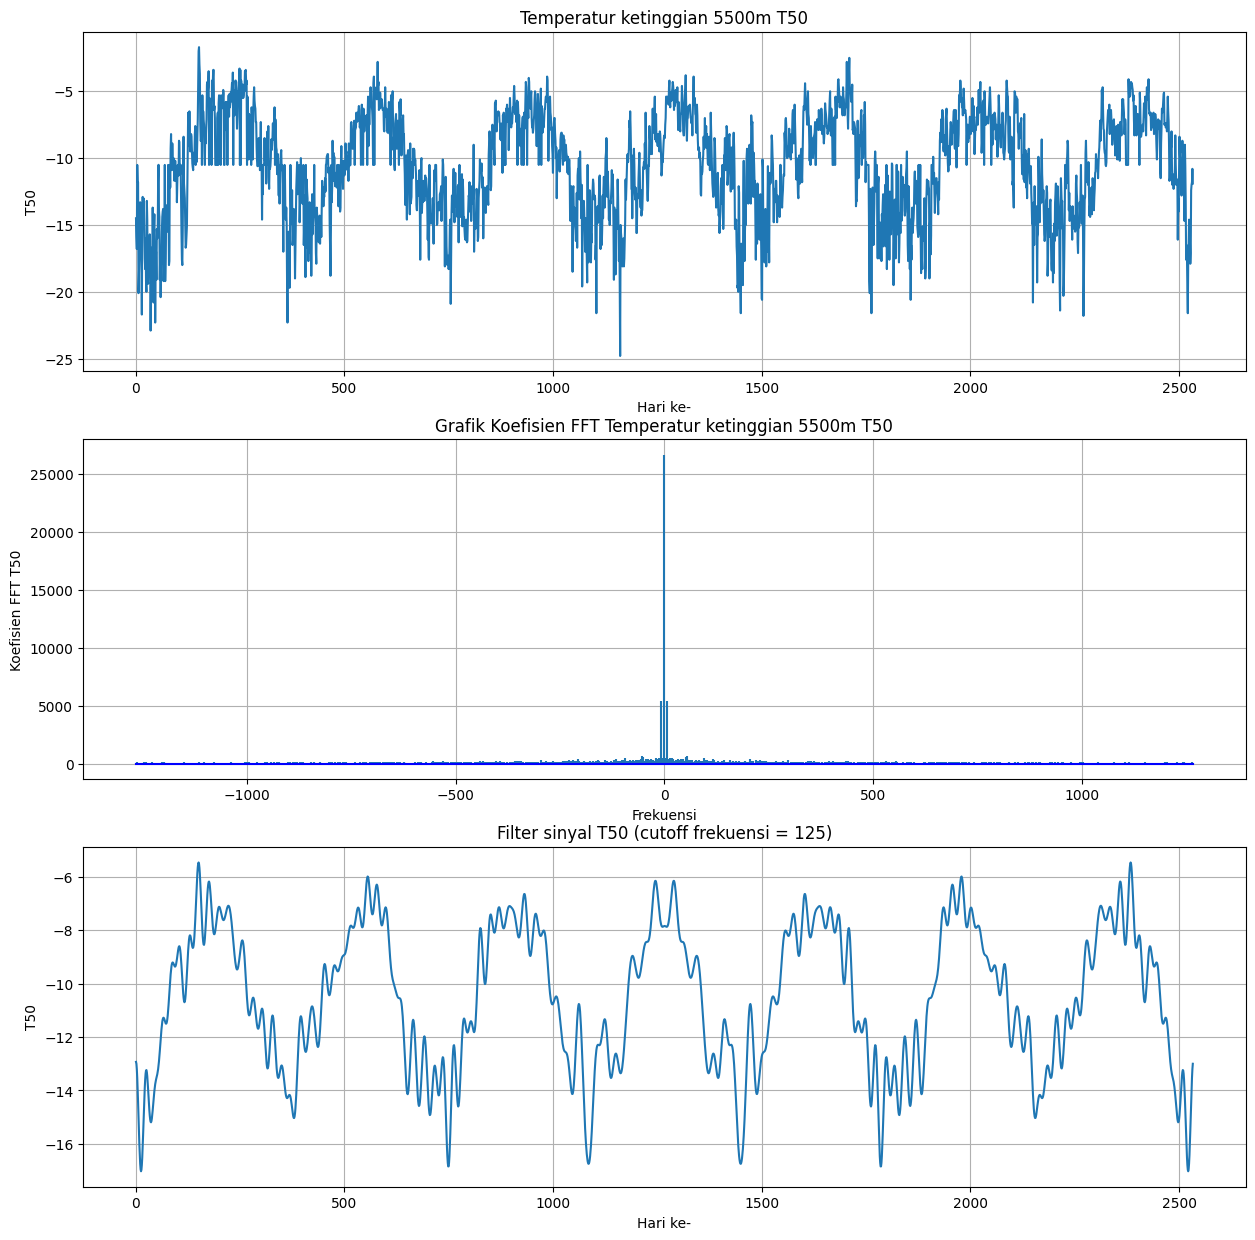

In [217]:
N = len(df['Date'])

Xk_T50 = np.fft.fft(df['T50'])
freq_T50 = np.fft.fftfreq(N, 1/N)
cutoff_freq = 125
low_pass_filter = np.ones_like(freq_T50)
low_pass_filter[np.abs(freq_T50) > cutoff_freq] = 0
filter_dft_T50 = np.real(Xk_T50) * low_pass_filter
filter_sinyal_T50 = np.fft.ifft(filter_dft_T50)

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(df['Date'], df['T50'])
plt.title('Temperatur ketinggian 5500m T50')
plt.xlabel('Hari ke-')
plt.ylabel('T50')
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(freq_T50, abs(Xk_T50), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT T50')
plt.title(f'Grafik Koefisien FFT Temperatur ketinggian 5500m T50')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['Date'], filter_sinyal_T50)
plt.title(f'Filter sinyal T50 (cutoff frekuensi = {cutoff_freq})')
plt.xlabel('Hari ke-')
plt.ylabel('T50')
plt.grid(True)

plt.show()

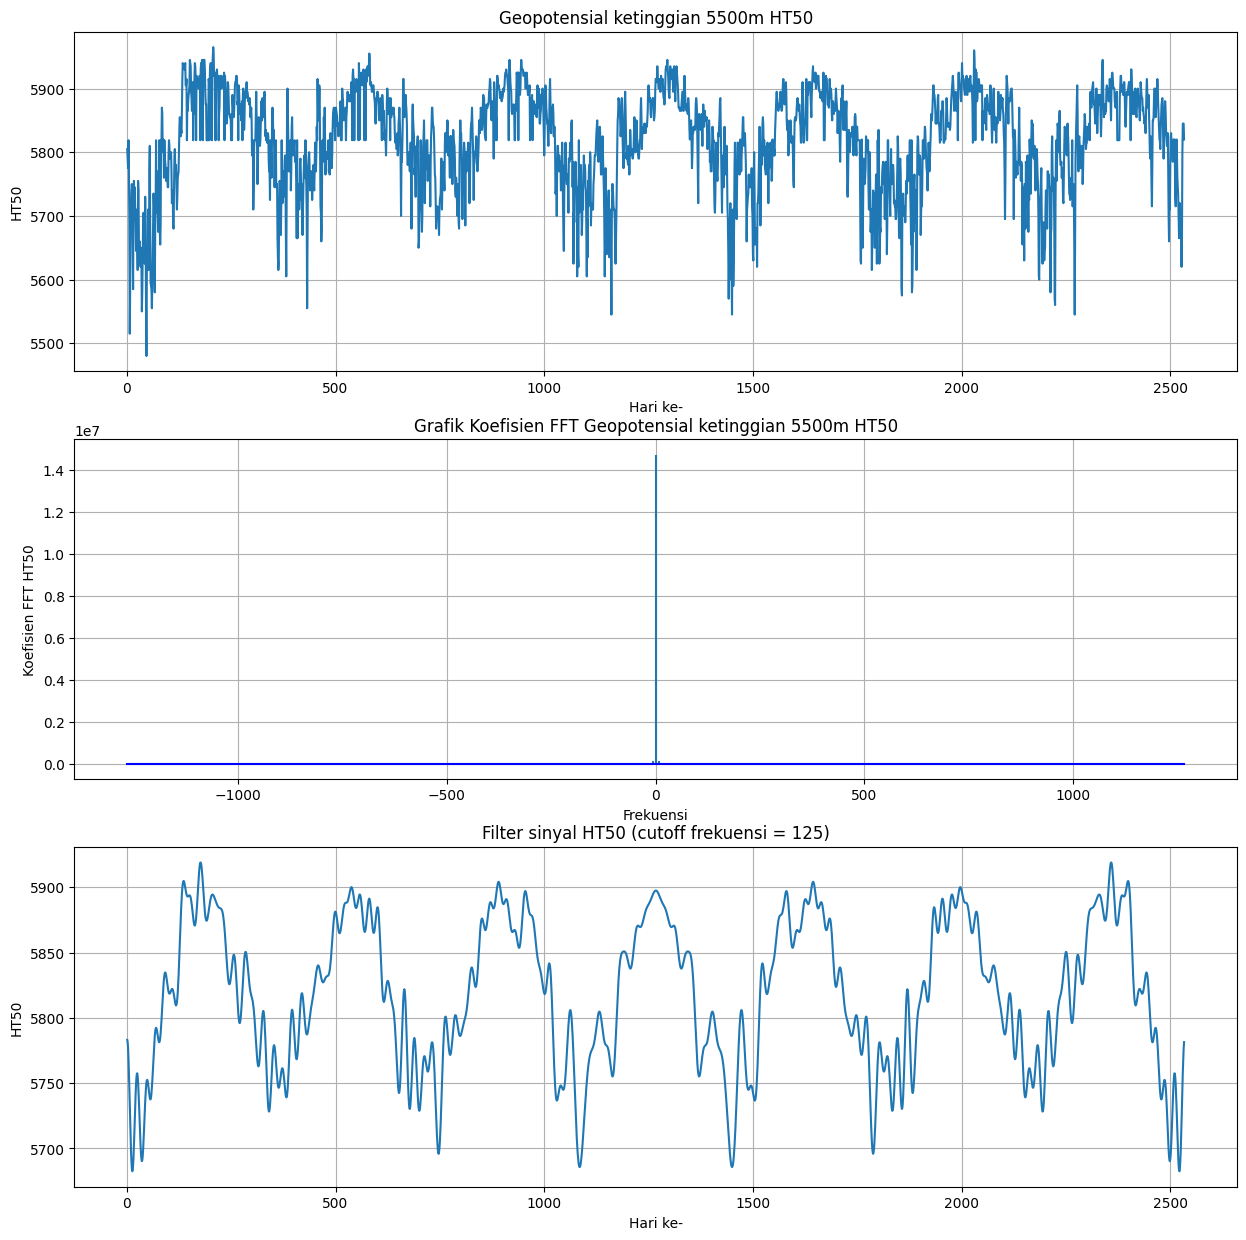

In [218]:
N = len(df['Date'])

Xk_HT50 = np.fft.fft(df['HT50'])
freq_HT50 = np.fft.fftfreq(N, 1/N)
cutoff_freq = 125
low_pass_filter = np.ones_like(freq_HT50)
low_pass_filter[np.abs(freq_HT50) > cutoff_freq] = 0
filter_dft_HT50 = np.real(Xk_HT50) * low_pass_filter
filter_sinyal_HT50 = np.fft.ifft(filter_dft_HT50)

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(df['Date'], df['HT50'])
plt.title('Geopotensial ketinggian 5500m HT50')
plt.xlabel('Hari ke-')
plt.ylabel('HT50')
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(freq_T50, abs(Xk_HT50), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT HT50')
plt.title(f'Grafik Koefisien FFT Geopotensial ketinggian 5500m HT50')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['Date'], filter_sinyal_HT50)
plt.title(f'Filter sinyal HT50 (cutoff frekuensi = {cutoff_freq})')
plt.xlabel('Hari ke-')
plt.ylabel('HT50')
plt.grid(True)

plt.show()

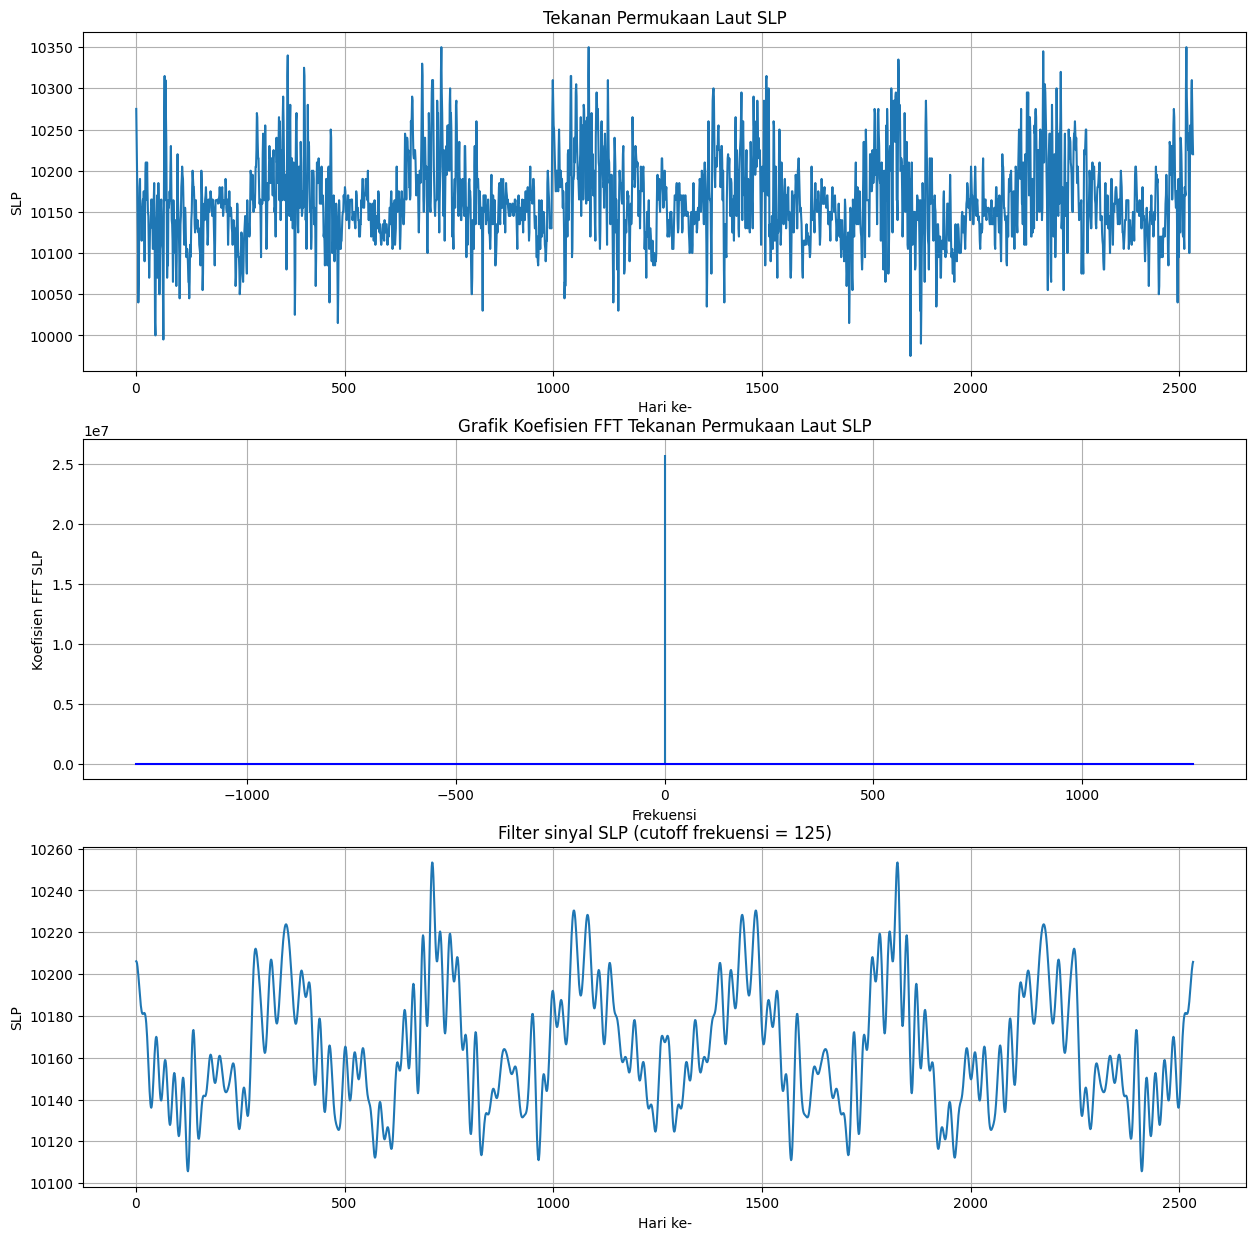

In [219]:
N = len(df['Date'])

Xk_slp = np.fft.fft(df['SLP'])
freq_slp = np.fft.fftfreq(N, 1/N)
cutoff_freq = 125
low_pass_filter = np.ones_like(freq_slp)
low_pass_filter[np.abs(freq_slp) > cutoff_freq] = 0
filter_dft_slp = np.real(Xk_slp) * low_pass_filter
filter_sinyal_slp = np.fft.ifft(filter_dft_slp)

plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.plot(df['Date'], df['SLP'])
plt.title('Tekanan Permukaan Laut SLP')
plt.xlabel('Hari ke-')
plt.ylabel('SLP')
plt.grid(True)

plt.subplot(3,1,2)
plt.stem(freq_slp, abs(Xk_slp), markerfmt='', basefmt='b')
plt.xlabel('Frekuensi')
plt.ylabel(f'Koefisien FFT SLP')
plt.title(f'Grafik Koefisien FFT Tekanan Permukaan Laut SLP')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['Date'], filter_sinyal_slp)
plt.title(f'Filter sinyal SLP (cutoff frekuensi = {cutoff_freq})')
plt.xlabel('Hari ke-')
plt.ylabel('SLP')
plt.grid(True)

plt.show()

### Analisis Metode FFT dan Filtering Frekuensi FFT

Metode Transformasi Fourier Diskrit (DFT) digunakan untuk menghitung sinyal dari domain waktu ke domain frekuensi. Dalam hal ini domain waktu yang digunakan adalah hari, jadi ada 2526 hari atau $N = 2526$. Sehabis itu didapatkan nilai Koefisien Fourier terbesar dari tiap fenomena/varabel. Koefisien yang terbesar atau bernilai besar merupakan nilai noise/pengganggu dari suatu sinyal. Hal ini dapat dianalisis untuk data pada Machine Learning. <pr>

Koefisien pengganggu/noise dapat dihilangkan melakukan filtering terhadap koefisien Fourier yang bernilai besar dengan analisis Teorema Nyquist-Shannon, yang dimana: <pr>

$$f_{\text{sampling}} = \frac{N}{\Delta t}$$
$$f_{\text{Nyquist}} = \frac{f_{\text{sampling}}}{2}$$

Sehingga frekuensi Nyquistnya adalah $f_{\text{Nyquist}} = \frac{2526}{2} = 1263 Hz$. Untuk memfilter koefisien Fourier terbesar digunakan rumus:<pr>
$$\text{Cutoff}_{\text{frekuensi}} = \frac{f_{\text{sampling}}}{2} = \frac{2526}{2} = 1263 Hz$$

Syarat nilai untuk memfilter koefisien Fourier yang besar harus $\text{Cutoff}_{\text{frekuensi}} > \frac{f_{\text{sampling}}}{2} = 1263 $. Perhitungan kami memakai $\text{Cutoff}_{\text{frekuensi}} = 125$ dan nilai mengambil nilai Koefisien Fourier bagian yang REAL. Kemudian didapatkan grafik inverse FFT tiap variabel/fenomena yang sudah difilter menggunakan metode Nyquist-Shannon, sehingga nilai Koefisien Fourier yang besar/terbesar hilang dan data dapat digunakan untuk model Machine Learning/Pengolahan Citra/Pengolahan Sinyal.

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:White;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          text-align:Center;"
          >
      Dimensionality Reduction with Principal Component Analysis (PCA)

#### Plot Data by Date

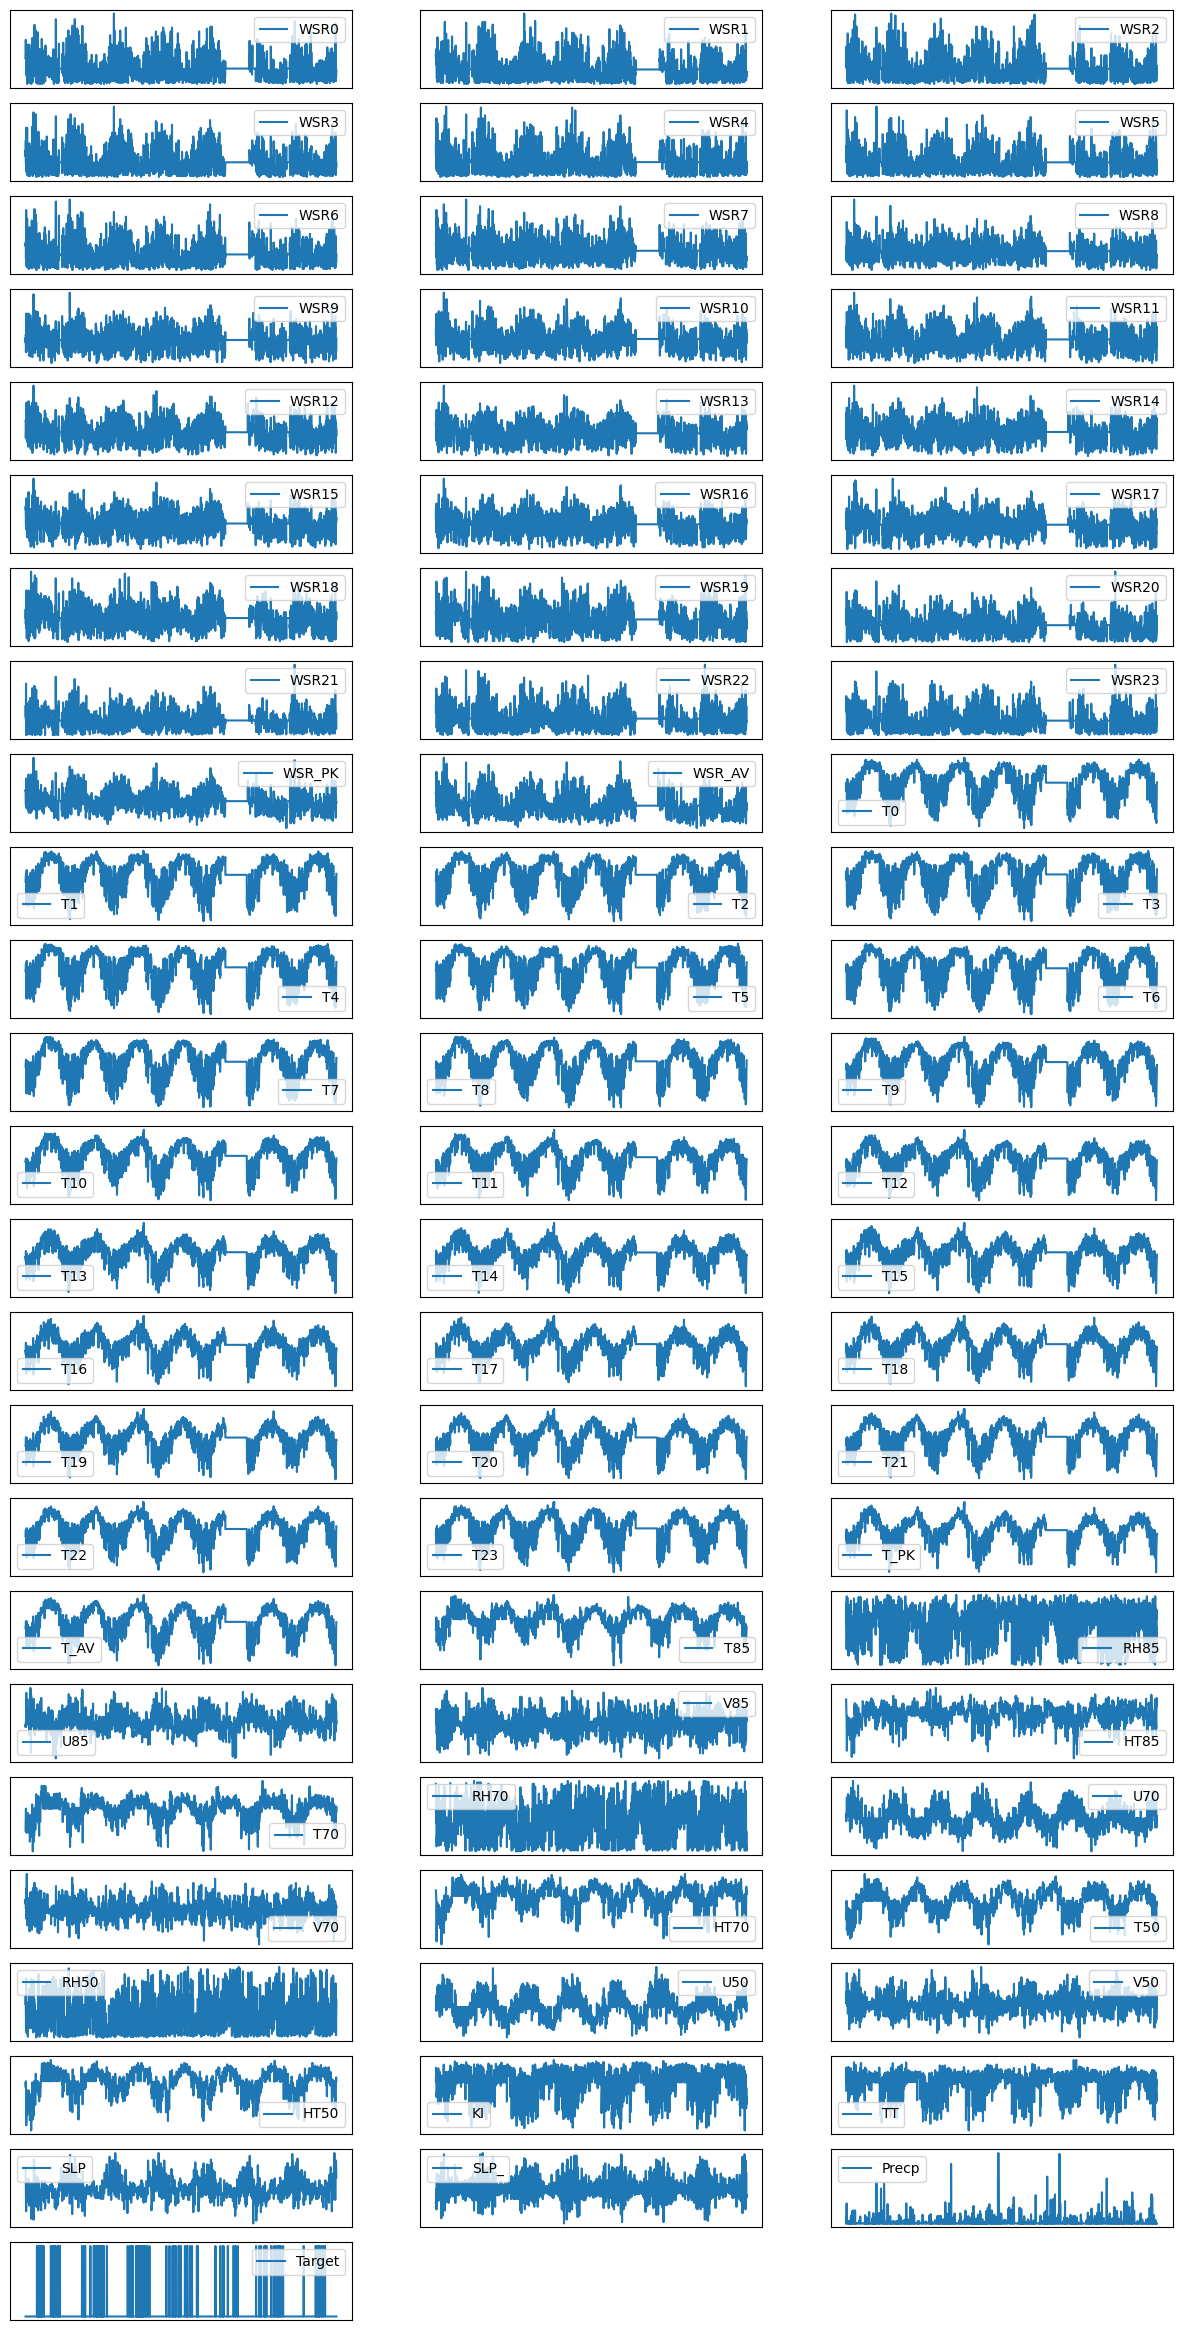

In [220]:
newdf1 = df.copy()
column = newdf1.columns.to_numpy()
column = np.delete(column, 0)
count = 0

plt.figure(figsize=(15,30))
for i in column:
    count += 1
    plt.subplot(25,3,count)
    plt.plot(newdf1['Date'], newdf1[i], label = i)
    plt.legend()
    plt.xticks([])
    plt.yticks([])

#### Give Target Name

In [221]:
# Mengganti nilai '0' menjadi 'A' dan nilai '1' menjadi 'B'
newdf1['Target'] = newdf1['Target'].replace({0: 'Normal Day', 1: 'Ozon Day'})

# Tampilkan DataFrame setelah penggantian
newdf1

Date  WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  ...  \
0        1   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1  ...   
1        2   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2  ...   
2        3   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4  ...   
3        4   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3  ...   
4        5   3.1   3.5   3.3   2.5   1.6   1.7   1.6   1.6   2.3  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2528  2529   0.3   0.4   0.5   0.5   0.2   0.3   0.4   0.4   1.3  ...   
2529  2530   1.0   1.4   1.1   1.7   1.5   1.7   1.8   1.5   2.1  ...   
2530  2531   0.8   0.8   1.2   0.9   0.4   0.6   0.8   1.1   1.5  ...   
2531  2532   1.3   0.9   1.5   1.2   1.6   1.8   1.1   1.0   1.9  ...   
2532  2533   1.5   1.3   1.8   1.4   1.2   1.7   1.6   1.4   1.6  ...   

         RH50        U50        V50         HT50         KI         TT  \
0     0.48000   8.390000   3.840000  5805.000000  14.050000  29.000000   
1     0.60000   6.940000   9.800000  5790.000000  17.900000  41.300000   
2     0.49000   8.730000  10.540000  5775.000000  31.150000  51.700000   
3     0.30478   9.872075   0.831145  5818.831062  10.520484  37.396429   
4     0.09000  11.980000  11.280000  5770.000000  27.950000  46.250000   
...       ...        ...        ...          ...        ...        ...   
2528  0.07000   7.930000  -4.410000  5800.000000 -25.600000  21.800000   
2529  0.04000   5.950000  -1.140000  5845.000000 -19.400000  19.100000   
2530  0.06000   7.800000  -0.640000  5845.000000  -9.600000  35.200000   
2531  0.25000   7.720000  -0.890000  5845.000000 -19.600000  34.200000   
2532  0.54000  13.070000   9.150000  5820.000000   1.950000  39.350000   

               SLP       SLP_  Precp      Target  
0     10275.000000 -55.000000   0.00  Normal Day  
1     10235.000000 -40.000000   0.00  Normal Day  
2     10195.000000 -40.000000   2.08  Normal Day  
3     10164.130435  -0.096842   0.58  Normal Day  
4     10120.000000  -0.096842   5.84  Normal Day  
...            ...        ...    ...         ...  
2528  10295.000000  65.000000   0.00  Normal Day  
2529  10310.000000  15.000000   0.00  Normal Day  
2530  10275.000000 -35.000000   0.00  Normal Day  
2531  10245.000000 -30.000000   0.05  Normal Day  
2532  10220.000000 -25.000000   0.00  Normal Day  

[2533 rows x 74 columns]

#### Select Data Wind Speed to doing PCA

In [222]:
# Memilih kolom yang diinginkan
selected_columns = ["WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","Target"]

# Membuat DataFrame baru dengan kolom yang dipilih
new_df = newdf1[selected_columns]

# Menampilkan DataFrame baru
new_df

WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  WSR9  ...  WSR17  \
0      2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1   3.4  ...    3.0   
1      2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2   2.5  ...    4.4   
2      4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4   3.1  ...    2.4   
3      2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3   1.4  ...    3.0   
4      3.1   3.5   3.3   2.5   1.6   1.7   1.6   1.6   2.3   1.8  ...    4.4   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
2528   0.3   0.4   0.5   0.5   0.2   0.3   0.4   0.4   1.3   2.2  ...    2.0   
2529   1.0   1.4   1.1   1.7   1.5   1.7   1.8   1.5   2.1   2.4  ...    3.6   
2530   0.8   0.8   1.2   0.9   0.4   0.6   0.8   1.1   1.5   1.5  ...    3.0   
2531   1.3   0.9   1.5   1.2   1.6   1.8   1.1   1.0   1.9   2.0  ...    3.1   
2532   1.5   1.3   1.8   1.4   1.2   1.7   1.6   1.4   1.6   3.0  ...    3.0   

      WSR18  WSR19  WSR20  WSR21  WSR22  WSR23  WSR_PK  WSR_AV      Target  
0       2.6    3.0    2.2    2.3    2.5    2.8     5.5     3.4  Normal Day  
1       3.5    2.7    2.9    3.9    4.1    4.6     5.6     3.5  Normal Day  
2       1.9    3.2    4.1    3.9    4.5    4.3     4.7     3.2  Normal Day  
3       2.4    2.8    2.5    2.5    3.7    3.4     3.7     2.3  Normal Day  
4       4.3    3.2    6.2    6.8    5.1    4.0     6.8     3.2  Normal Day  
...     ...    ...    ...    ...    ...    ...     ...     ...         ...  
2528    1.7    1.5    1.3    1.3    1.3    1.1     3.9     1.6  Normal Day  
2529    2.7    3.1    2.1    1.8    1.6    1.1     5.0     2.6  Normal Day  
2530    2.3    1.3    1.2    0.8    1.6    1.8     3.9     1.9  Normal Day  
2531    3.2    2.3    1.8    1.7    1.4    1.3     4.0     2.1  Normal Day  
2532    2.5    2.1    3.2    2.8    3.1    3.2     4.0     2.5  Normal Day  

[2533 rows x 27 columns]

#### Data Standarization

In [223]:
x_pca = new_df.iloc[:,0:26].values
y_pca = new_df.iloc[:,26].values

In [224]:
pca_df = StandardScaler().fit_transform(x_pca)

#### Calculate Matrix Covariance

In [225]:
mean_vec = np.mean(pca_df, axis=0)
cov_mat = (pca_df - mean_vec).T.dot((pca_df - mean_vec)) / (pca_df.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00039494 0.91948401 0.8598525  0.80226608 0.7530911  0.70234692
  0.66412256 0.59594428 0.54115478 0.49540678 0.46545579 0.44001189
  0.41412544 0.38476442 0.34349351 0.33004904 0.30535437 0.25471777
  0.24241001 0.26237053 0.27721587 0.32330684 0.33235849 0.3442923
  0.50603961 0.68115304]
 [0.91948401 1.00039494 0.92503285 0.85108756 0.80174159 0.74653368
  0.70910899 0.64103565 0.57539621 0.52190596 0.48397552 0.45980047
  0.42731973 0.39265985 0.34904913 0.33640468 0.3105797  0.25679338
  0.23746845 0.25127063 0.26112943 0.31118982 0.32204295 0.33637887
  0.51589599 0.7024421 ]
 [0.8598525  0.92503285 1.00039494 0.91687723 0.84631711 0.78526
  0.74623793 0.67366107 0.60695854 0.55630462 0.51278186 0.48884397
  0.46329441 0.42790361 0.38608591 0.35942025 0.32748898 0.26459898
  0.23893941 0.25471759 0.26311002 0.31656562 0.33061777 0.34617529
  0.53350067 0.72917323]
 [0.80226608 0.85108756 0.91687723 1.00039494 0.91387261 0.84589651
  0.7888751  0.70777236 0.

#### Calculate Eigen Values and Eigen Vectors

In [226]:
cov_mat = np.cov(pca_df.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.81119860e-01 -2.24870471e-01 -1.55804573e-01 -2.54789759e-01
  -9.22160519e-02  3.88041609e-01  1.51406527e-01 -1.55297046e-01
  -1.67145288e-01 -1.37883630e-01  3.29068234e-01  1.77258973e-01
  -4.98530613e-02  2.50979135e-01 -1.21641228e-01  2.89783720e-01
   1.91136737e-01  1.50609658e-01  2.45411209e-01  1.03458977e-01
   6.77597865e-02 -4.75374091e-02 -1.44454908e-01  3.33586378e-01
  -3.55590162e-02  1.40479033e-03]
 [-1.86913977e-01 -2.46672947e-01 -1.49554620e-01 -2.46951715e-01
  -6.63224860e-02  3.32469491e-01  1.17848650e-01 -8.20521404e-02
  -1.10996717e-01 -1.81097731e-02  1.40349218e-01  3.11390851e-02
  -6.06657741e-02 -2.15650906e-02  3.68717616e-02 -9.68092165e-02
  -5.00060553e-01 -1.00410978e-01 -1.96420565e-01 -2.37608555e-01
  -1.34042953e-01  2.95509574e-02  2.72270382e-01 -4.32153107e-01
   4.58888599e-02  9.99303787e-03]
 [-1.94248494e-01 -2.52256922e-01 -1.29915612e-01 -2.17195643e-01
  -6.22402491e-02  2.07197352e-01  3.84032045e-02 -1.44100

#### Identify Variance from PCA

In [227]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp1 = np.cumsum(var_exp)

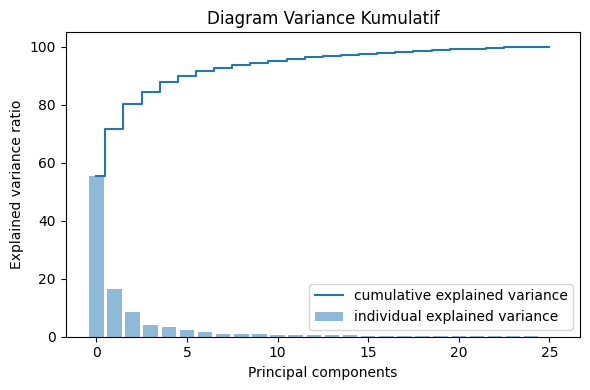

In [228]:
plt.figure(figsize=(6, 4))

plt.bar(range(26), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(26), cum_var_exp1, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Diagram Variance Kumulatif')
plt.legend(loc='best')
plt.tight_layout()

In [229]:
print("1. Kenaikan varians per dimensi\n",var_exp)
print("\n2. Total varians berdasarkan jumlah komponen \n",cum_var_exp1)
print("\n3. Persentase kumulatif varians dimensi 2\n",sum(var_exp[0:2]))
print("\n4. Persentase kumulatif varians dimensi 3\n",sum(var_exp[0:3]))

1. Kenaikan varians per dimensi
 [55.40605827059516, 16.328342424943553, 8.558258494799418, 4.214528184216086, 3.361572406659149, 2.2196410800468245, 1.4765361635044418, 1.0823608059275225, 0.9392704818517962, 0.8265076694566933, 0.7416388070323988, 0.6443781044859574, 0.5577112978736415, 0.47743501355940066, 0.43644303250674094, 0.3783243103464181, 0.3561009645299618, 0.317281075917764, 0.2850517889926325, 0.27428523827334356, 0.26039959717613737, 0.250153792260169, 0.21275734606436952, 0.19046443599678117, 0.1713014031583267, 0.03319780982529951]

2. Total varians berdasarkan jumlah komponen 
 [ 55.40605827  71.7344007   80.29265919  84.50718737  87.86875978
  90.08840086  91.56493702  92.64729783  93.58656831  94.41307598
  95.15471479  95.79909289  96.35680419  96.8342392   97.27068224
  97.64900655  98.00510751  98.32238859  98.60744038  98.88172562
  99.14212521  99.392279    99.60503635  99.79550079  99.96680219
 100.        ]

3. Persentase kumulatif varians dimensi 2
 71.73440

#### Performing PCA using a manual method

In [230]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(26,1),
                      eig_pairs[1][1].reshape(26,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.18111986 -0.22487047]
 [-0.18691398 -0.24667295]
 [-0.19424849 -0.25225692]
 [-0.19672843 -0.25760067]
 [-0.19401427 -0.26485611]
 [-0.19384861 -0.25368331]
 [-0.19584209 -0.2384847 ]
 [-0.19120354 -0.20911222]
 [-0.19208333 -0.1611166 ]
 [-0.20357992 -0.09060497]
 [-0.21211445 -0.02750064]
 [-0.21279962  0.01239001]
 [-0.21110695  0.04563539]
 [-0.20839158  0.08672833]
 [-0.2022751   0.12451643]
 [-0.19885859  0.15681852]
 [-0.19218771  0.19475122]
 [-0.18041891  0.24849648]
 [-0.17106794  0.26390798]
 [-0.17032151  0.26162614]
 [-0.17054595  0.25823054]
 [-0.17630587  0.23069517]
 [-0.17549302  0.20863214]
 [-0.17281193  0.18084757]
 [-0.22634926  0.06877796]
 [-0.26229016  0.00822955]]


In [231]:
Y_manual_pca = pca_df.dot(matrix_w)
Y_manual_pca[:, 0] = -Y_manual_pca[:, 0]
Y_manual_pca[:, 1] = Y_manual_pca[:, 1]

In [232]:
Y_manual_pca

array([[ 4.73769626, -1.21794324],
       [ 5.00915648,  1.65601655],
       [ 3.78546408, -1.49526081],
       ...,
       [-1.77866362,  1.08239069],
       [-0.83180716,  0.85232637],
       [ 0.80965989,  1.35803636]])

Plotting data to see PCA

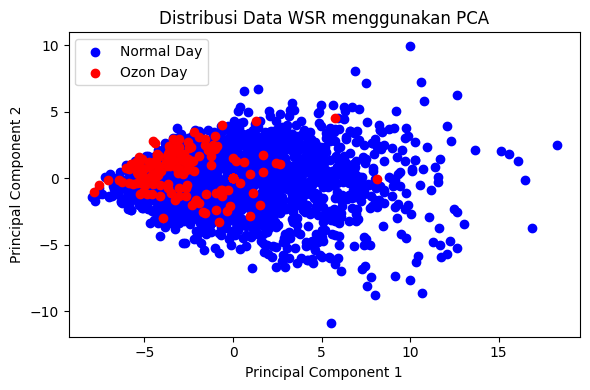

In [233]:
# Ploting PCA 2 Dimensions

plt.figure(figsize=(6, 4))
for lab_grad, col in zip(('Normal Day', 'Ozon Day'),
                    ('blue', 'red')):
    plt.scatter(Y_manual_pca[y_pca==lab_grad, 0],
                Y_manual_pca[y_pca==lab_grad, 1],
                label=lab_grad,
                c=col)
plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Distribusi Data WSR menggunakan PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Show data for each component PCA

In [234]:
principalDf = pd.DataFrame(data = Y_manual_pca
          , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf,pd.DataFrame(y_pca,columns = ['Target'])], axis = 1)
finalDf

principal component 1  principal component 2      Target
0                  4.737696              -1.217943  Normal Day
1                  5.009156               1.656017  Normal Day
2                  3.785464              -1.495261  Normal Day
3                 -0.348768               1.169276  Normal Day
4                  4.162045               2.617091  Normal Day
...                     ...                    ...         ...
2528              -2.879120               1.477096  Normal Day
2529               1.490464               1.177941  Normal Day
2530              -1.778664               1.082391  Normal Day
2531              -0.831807               0.852326  Normal Day
2532               0.809660               1.358036  Normal Day

[2533 rows x 3 columns]

#### Performing PCA using Sk-Learn

Show data for each component PCA

In [235]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn_grad = sklearn_pca.fit_transform(x_pca)
Y_sklearnDf_grad = pd.DataFrame(data = Y_sklearn_grad
              , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, finalDf[['Target']]], axis = 1)

finalDf

principal component 1  principal component 2      Target
0                  4.737696              -1.217943  Normal Day
1                  5.009156               1.656017  Normal Day
2                  3.785464              -1.495261  Normal Day
3                 -0.348768               1.169276  Normal Day
4                  4.162045               2.617091  Normal Day
...                     ...                    ...         ...
2528              -2.879120               1.477096  Normal Day
2529               1.490464               1.177941  Normal Day
2530              -1.778664               1.082391  Normal Day
2531              -0.831807               0.852326  Normal Day
2532               0.809660               1.358036  Normal Day

[2533 rows x 3 columns]

Show screeplot 

In [236]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_var = sklearnPCA(n_components=10)
Y_sklearn_grad = sklearn_pca_var.fit_transform(x_pca)
explained_variance_ratio = sklearn_pca_var.explained_variance_ratio_

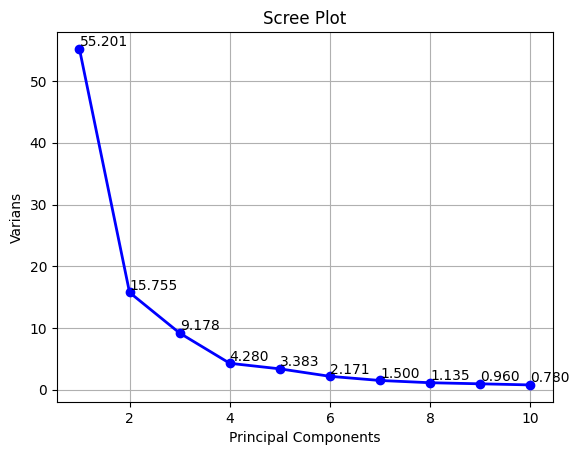

In [237]:
PC_values = np.arange(sklearn_pca_var.n_components) + 1
plt.plot(PC_values, explained_variance_ratio*100, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Varians')
plt.grid()
for pc, var_ratio in zip(PC_values, explained_variance_ratio*100):
    plt.text(pc, var_ratio, f'{var_ratio:.3f}', ha='left', va='bottom')
plt.show()

Show biplot

In [238]:
features = ["WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV"]
loadings = pd.DataFrame(sklearn_pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=features)
scalePC1 = 1.0 / (loadings['Principal Component 1'].max() - loadings['Principal Component 1'].min())
scalePC2 = 1.0 / (loadings['Principal Component 2'].max() - loadings['Principal Component 2'].min())

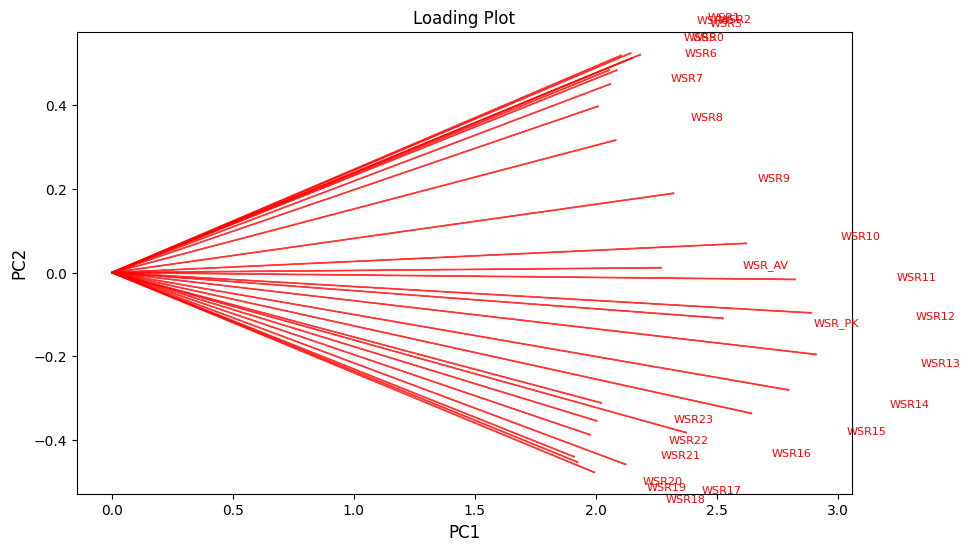

In [239]:
fig, ax1 = plt.subplots(figsize=(10, 6))  

# Loading Plot
for feature in loadings.index:
    color = 'blue' if feature.startswith('B') else 'red'
    ax1.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1,
              loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
    ax1.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1,
             loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=8, color=color)

ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Loading Plot', fontsize=12)
plt.show()


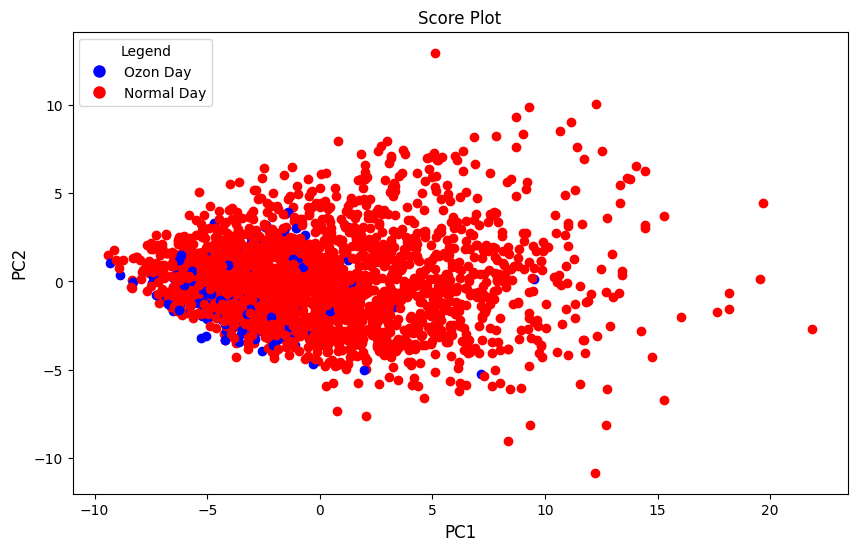

In [240]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Loading Plot
for pc1, pc2, Target in zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], new_df.Target):
    color = 'blue' if Target.startswith('Ozon Day') else 'red'
    scatter = ax1.scatter(pc1, pc2, color=color)

# Custom legend elements for Label A and Label B
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Ozon Day'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Normal Day')
]

ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Score Plot', fontsize=12)

# Common legend for both plots
ax1.legend(handles=legend_elements, title='Legend', loc='upper left')

plt.show()


#### Select Data Temperature to doing PCA

In [241]:
# Choose column
selected_columns = ["T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","Target"]

# Make new dataframe
new_dfT = df[selected_columns]

# Show dataframe
new_dfT

T0    T1    T2    T3    T4    T5    T6    T7    T8    T9  ...   T18  \
0     15.1  15.3  15.6  15.6  15.9  16.2  16.2  16.2  16.6  17.8  ...  18.1   
1     16.6  16.7  16.7  16.8  16.8  16.8  16.9  16.9  17.1  17.6  ...  18.6   
2     18.3  18.2  18.3  18.4  18.6  18.6  18.5  18.7  18.6  18.8  ...  18.6   
3     18.8  18.6  18.5  18.5  18.6  18.9  19.2  19.4  19.8  20.5  ...  22.9   
4     18.9  19.5  19.6  19.5  19.5  19.5  19.4  19.2  19.1  19.5  ...  17.6   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2528   2.8   2.3   1.6   1.2   1.3   1.3   1.2   1.1   3.8   7.6  ...  11.3   
2529   7.0   6.9   7.1   7.6   7.7   7.7   7.7   7.8   9.4  12.4  ...  15.4   
2530  15.3  14.8  15.0  14.8  14.2  14.2  14.9  15.6  17.1  18.6  ...  18.2   
2531  18.1  18.0  18.0  18.3  18.3  18.4  18.4  18.4  18.9  18.8  ...  21.1   
2532  18.8  18.8  19.7  20.1  20.0  19.8  20.0  20.2  20.3  19.8  ...  19.5   

       T19   T20   T21   T22   T23  T_PK  T_AV        T85  Target  
0     17.2  16.5  16.1  16.0  16.2  22.4  17.8   9.000000     0.0  
1     18.0  18.0  18.2  18.3  18.4  22.2  18.7   9.000000     0.0  
2     18.5  18.3  18.5  18.8  18.9  19.6  18.7   9.900000     0.0  
3     21.6  20.0  19.5  19.1  19.1  26.0  21.1  13.578122     0.0  
4     16.9  15.6  15.4  15.9  15.8  19.6  18.5  14.400000     0.0  
...    ...   ...   ...   ...   ...   ...   ...        ...     ...  
2528   9.9   8.8   7.9   7.3   7.0  14.8   7.7   5.500000     0.0  
2529  15.1  15.0  14.8  15.1  15.3  18.4  12.9   5.800000     0.0  
2530  18.1  18.5  18.7  18.4  18.2  20.6  17.7   7.500000     0.0  
2531  20.4  19.8  19.5  19.1  18.7  23.6  19.9   9.300000     0.0  
2532  20.2  20.9  21.2  20.8  20.4  23.5  20.7  10.100000     0.0  

[2533 rows x 28 columns]

#### Data Standarization

In [242]:
x_pca = new_dfT.iloc[:,0:27].values
y_pca1 = new_dfT.iloc[:,27].values

In [243]:
x_pca

array([[15.1, 15.3, 15.6, ..., 22.4, 17.8,  9. ],
       [16.6, 16.7, 16.7, ..., 22.2, 18.7,  9. ],
       [18.3, 18.2, 18.3, ..., 19.6, 18.7,  9.9],
       ...,
       [15.3, 14.8, 15. , ..., 20.6, 17.7,  7.5],
       [18.1, 18. , 18. , ..., 23.6, 19.9,  9.3],
       [18.8, 18.8, 19.7, ..., 23.5, 20.7, 10.1]])

In [244]:
x_pca

array([[15.1, 15.3, 15.6, ..., 22.4, 17.8,  9. ],
       [16.6, 16.7, 16.7, ..., 22.2, 18.7,  9. ],
       [18.3, 18.2, 18.3, ..., 19.6, 18.7,  9.9],
       ...,
       [15.3, 14.8, 15. , ..., 20.6, 17.7,  7.5],
       [18.1, 18. , 18. , ..., 23.6, 19.9,  9.3],
       [18.8, 18.8, 19.7, ..., 23.5, 20.7, 10.1]])

In [245]:
pca_df = StandardScaler().fit_transform(x_pca)

#### Calculate Matrix Covariance

In [246]:
mean_vec = np.mean(pca_df, axis=0)
cov_mat = (pca_df - mean_vec).T.dot((pca_df - mean_vec)) / (pca_df.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.00039494 0.99595635 0.99111231 0.986591   0.98046792 0.9747529
  0.97058629 0.96400038 0.94657281 0.91921723 0.89400176 0.87648886
  0.85960324 0.84469377 0.8339402  0.82519044 0.82494009 0.83663634
  0.85667753 0.86887796 0.87259737 0.87294751 0.86694032 0.86198022
  0.88215895 0.94191235 0.83229607]
 [0.99595635 1.00039494 0.99741573 0.99328416 0.98792167 0.98273125
  0.97732874 0.96879476 0.94877672 0.91918488 0.89296851 0.8744075
  0.85681559 0.84022396 0.82855357 0.81947783 0.81925207 0.83125386
  0.85248376 0.86619328 0.87210594 0.87244595 0.86792968 0.86294444
  0.8776116  0.94221568 0.83133443]
 [0.99111231 0.99741573 1.00039494 0.99750827 0.99271685 0.98824075
  0.98281592 0.97277569 0.9508378  0.91976221 0.89278858 0.87347419
  0.85528563 0.8384371  0.82613838 0.81648207 0.81607698 0.82842186
  0.85040672 0.86531739 0.87237729 0.87344559 0.86940225 0.86490197
  0.87406075 0.94248634 0.82858519]
 [0.986591   0.99328416 0.99750827 1.00039494 0.99764553 0.

#### Calculate Eigen Values and Eigen Vectors

In [247]:
cov_mat = np.cov(pca_df.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.89351661e-01  2.58667430e-01 -2.46656071e-02 -9.44324268e-02
  -2.19271384e-01  1.85754899e-01 -4.30933303e-01  1.73419466e-01
  -2.97614951e-01 -5.39714401e-02  1.78422235e-01 -2.44571369e-01
  -4.49333507e-01 -1.92648436e-01 -1.67795334e-01  1.30454413e-02
  -3.97849284e-02 -1.56387781e-01  6.09374823e-02  6.33569440e-02
   1.87616087e-01 -4.98083864e-02 -1.13887655e-01 -1.26706054e-02
  -2.20240731e-01  7.53430626e-02  1.05003811e-02]
 [ 1.89337204e-01  2.73619870e-01 -5.70527487e-04 -8.32852003e-02
  -2.01983523e-01  1.75697618e-01 -3.03606320e-01  7.61487457e-02
  -1.13603531e-01  4.59751846e-02  1.37771418e-02 -3.75043650e-02
   1.26736510e-01  7.75097276e-02  1.48686619e-01  7.00765029e-02
   1.83458426e-01  3.89482289e-01 -6.19512760e-02 -1.94726831e-02
  -3.96356828e-01  4.76556779e-02  3.87833087e-01 -2.26233607e-02
   3.56728303e-01 -1.25214478e-01 -6.48055550e-02]
 [ 1.89352423e-01  2.80320722e-01  2.40799603e-02 -7.29441682e-02
  -1.79887760e-01  1.44899

#### Identify Variance from PCA

In [248]:
tot = sum(eig_vals)
var_exp2 = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp2 = np.cumsum(var_exp2)

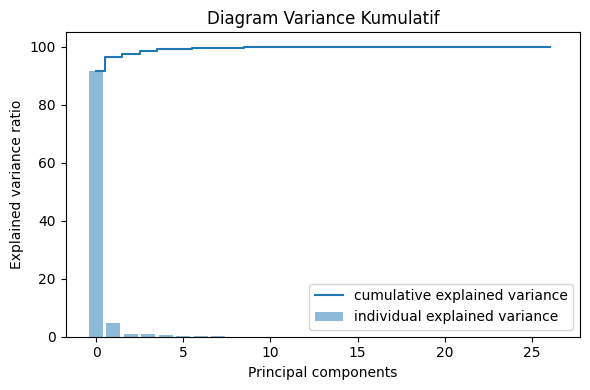

In [249]:
plt.figure(figsize=(6, 4))

plt.bar(range(27), var_exp2, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(27), cum_var_exp2, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Diagram Variance Kumulatif')
plt.legend(loc='best')
plt.tight_layout()

In [250]:
print("1. Kenaikan varians per dimensi\n",var_exp2)
print("\n2. Total varians berdasarkan jumlah komponen \n",cum_var_exp2)
print("\n3. Persentase kumulatif varians dimensi 2\n",sum(var_exp[0:2]))
print("\n4. Persentase kumulatif varians dimensi 3\n",sum(var_exp[0:3]))

1. Kenaikan varians per dimensi
 [91.7132531483785, 4.7201021369346, 1.0859068245062837, 1.021135020296877, 0.601523885218041, 0.24400105208646003, 0.17603537672908665, 0.08934864522445073, 0.07034242112453022, 0.06179596354675148, 0.040937278579399404, 0.030363481573452967, 0.02637205069807609, 0.019669521006205566, 0.015028821602388293, 0.012001393714309316, 0.01158388090370202, 0.010517444928030154, 0.00957939964213646, 0.008470453956489292, 0.006872546073781176, 0.006147939630684446, 0.005407804772569743, 0.0044171156134215715, 0.0039731626426965, 0.0031046598564687692, 0.0021085707605850213]

2. Total varians berdasarkan jumlah komponen 
 [ 91.71325315  96.43335529  97.51926211  98.54039713  99.14192102
  99.38592207  99.56195744  99.65130609  99.72164851  99.78344447
  99.82438175  99.85474523  99.88111728  99.90078681  99.91581563
  99.92781702  99.9394009   99.94991835  99.95949775  99.9679682
  99.97484075  99.98098869  99.98639649  99.99081361  99.99478677
  99.99789143 100. 

#### Performing PCA using a manual method

In [251]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(27,1),
                      eig_pairs[1][1].reshape(27,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.18935166  0.25866743]
 [ 0.1893372   0.27361987]
 [ 0.18935242  0.28032072]
 [ 0.18960733  0.28220877]
 [ 0.18978656  0.28008604]
 [ 0.19004284  0.27350436]
 [ 0.19138955  0.25051644]
 [ 0.19446479  0.18958146]
 [ 0.19698464  0.09836255]
 [ 0.19733607  0.00566283]
 [ 0.19651849 -0.06401131]
 [ 0.19578663 -0.11649178]
 [ 0.19465037 -0.16302312]
 [ 0.19298958 -0.19611717]
 [ 0.19171436 -0.22060571]
 [ 0.19062237 -0.23856967]
 [ 0.19052869 -0.23900795]
 [ 0.19195571 -0.2187769 ]
 [ 0.19436675 -0.17929842]
 [ 0.1957978  -0.14732171]
 [ 0.19595579 -0.12384955]
 [ 0.19539048 -0.1053404 ]
 [ 0.1938159  -0.09117424]
 [ 0.19240823 -0.07950558]
 [ 0.19575508 -0.13354066]
 [ 0.20082708  0.00040739]
 [ 0.16706987  0.17975344]]


In [252]:
Y_manual_pca = pca_df.dot(matrix_w)
Y_manual_pca[:, 0] = -Y_manual_pca[:, 0]
Y_manual_pca[:, 1] = Y_manual_pca[:, 1]

In [253]:
Y_manual_pca

array([[2.33593963, 0.23837676],
       [1.75133799, 0.34615242],
       [1.74148756, 1.37266546],
       ...,
       [2.52782059, 0.01785334],
       [0.83717431, 0.38676043],
       [0.2400745 , 0.86366348]])

Plotting data to see PCA

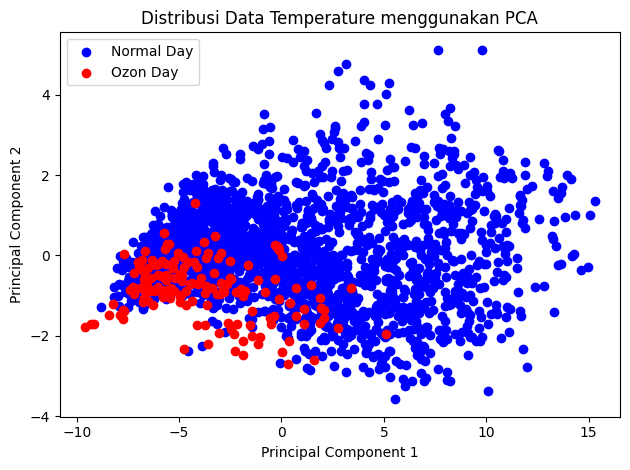

In [254]:
for lab_grad, col in zip(('Normal Day', 'Ozon Day'),
                    ('blue', 'red')):
    plt.scatter(Y_manual_pca[y_pca==lab_grad, 0],
                Y_manual_pca[y_pca==lab_grad, 1],
                label=lab_grad,
                c=col)
plt.title('')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Distribusi Data Temperature menggunakan PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Show data for each component PCA

In [255]:
principalDf = pd.DataFrame(data = Y_manual_pca
          , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf,pd.DataFrame(y_pca,columns = ['Target'])], axis = 1)
finalDf

principal component 1  principal component 2      Target
0                  2.335940               0.238377  Normal Day
1                  1.751338               0.346152  Normal Day
2                  1.741488               1.372665  Normal Day
3                 -0.194117               0.124151  Normal Day
4                  1.802256               2.104333  Normal Day
...                     ...                    ...         ...
2528               9.637155              -1.812732  Normal Day
2529               5.918800              -1.424827  Normal Day
2530               2.527821               0.017853  Normal Day
2531               0.837174               0.386760  Normal Day
2532               0.240075               0.863663  Normal Day

[2533 rows x 3 columns]

#### Performing PCA using Sk-Learn

Show data for each component PCA

In [256]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn_grad = sklearn_pca.fit_transform(x_pca)
Y_sklearnDf_grad = pd.DataFrame(data = Y_sklearn_grad
              , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, finalDf[['Target']]], axis = 1)

finalDf

principal component 1  principal component 2      Target
0                  2.335940               0.238377  Normal Day
1                  1.751338               0.346152  Normal Day
2                  1.741488               1.372665  Normal Day
3                 -0.194117               0.124151  Normal Day
4                  1.802256               2.104333  Normal Day
...                     ...                    ...         ...
2528               9.637155              -1.812732  Normal Day
2529               5.918800              -1.424827  Normal Day
2530               2.527821               0.017853  Normal Day
2531               0.837174               0.386760  Normal Day
2532               0.240075               0.863663  Normal Day

[2533 rows x 3 columns]

Show screeplot 

In [257]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_var = sklearnPCA(n_components=10)
Y_sklearn_grad = sklearn_pca_var.fit_transform(x_pca)
explained_variance_ratio = sklearn_pca_var.explained_variance_ratio_

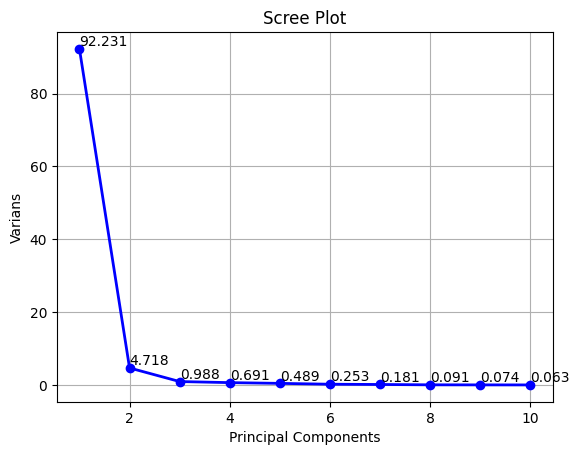

In [258]:
PC_values = np.arange(sklearn_pca_var.n_components) + 1
plt.plot(PC_values, explained_variance_ratio*100, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Varians')
plt.grid()
for pc, var_ratio in zip(PC_values, explained_variance_ratio*100):
    plt.text(pc, var_ratio, f'{var_ratio:.3f}', ha='left', va='bottom')
plt.show()

Show biplot

In [259]:
feature = ["T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV", "T85"]

loadings = pd.DataFrame(sklearn_pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=feature)
scalePC1 = 1.0 / (loadings['Principal Component 1'].max() - loadings['Principal Component 1'].min())
scalePC2 = 1.0 / (loadings['Principal Component 2'].max() - loadings['Principal Component 2'].min())

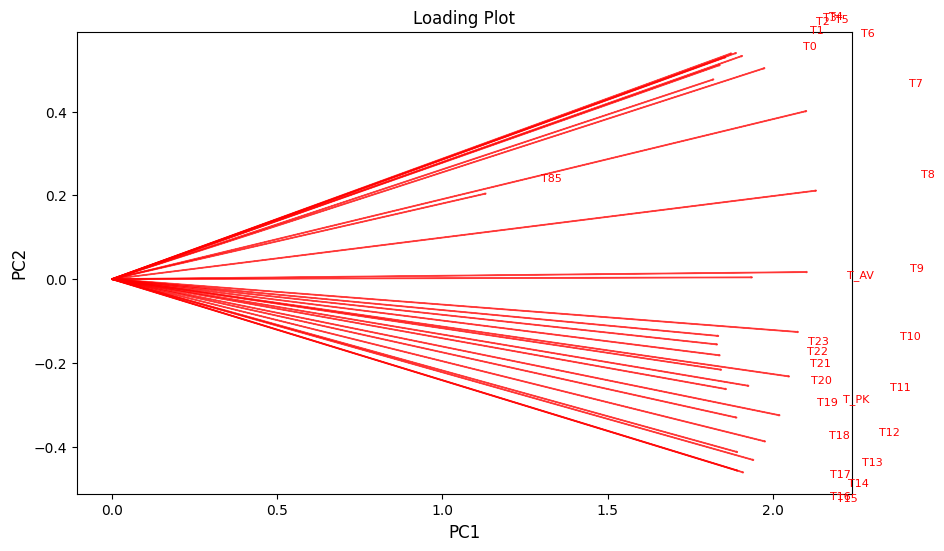

In [260]:
fig, ax2 = plt.subplots(figsize=(10, 6))  

for feature in loadings.index:
    color = 'blue' if feature.startswith('Ozon Day') else 'red'
    ax2.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1 * -1,
              loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
    ax2.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1 * -1,
             loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=8, color=color)

ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('Loading Plot', fontsize=12)
plt.show()

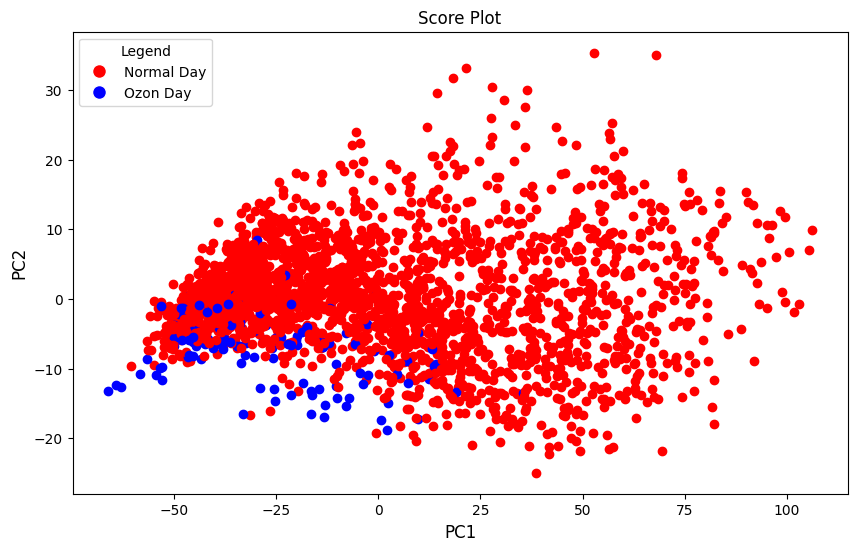

In [261]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Loading Plot
for pc1, pc2, Target in zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], new_df.Target):
    color = 'blue' if Target.startswith('Ozon Day') else 'red'
    scatter = ax1.scatter(pc1, pc2, color=color)

# Custom legend elements for Label A and Label B
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Normal Day'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Ozon Day')
]
ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Score Plot', fontsize=12)

# Common legend for both plots
ax1.legend(handles=legend_elements, title='Legend', loc='upper left')

plt.show()


#### Analyze Data

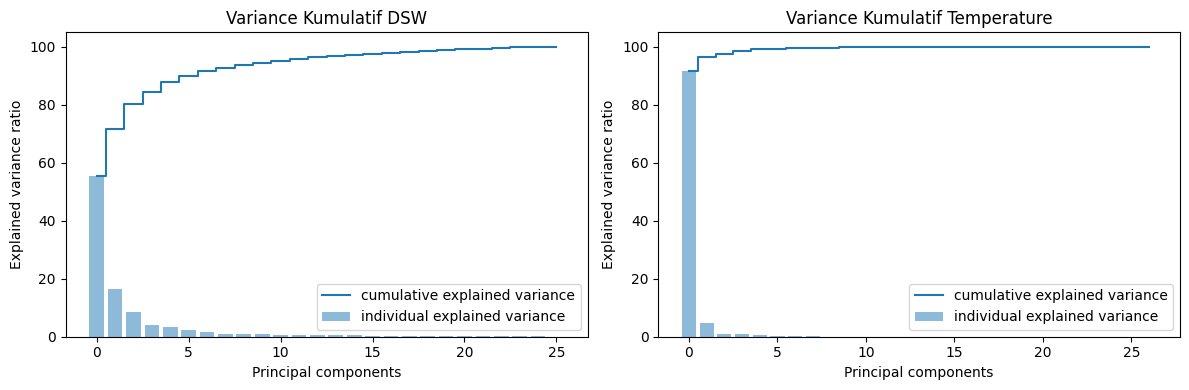

In [262]:
var_exp_trimmed = var_exp[:26]
cum_var_exp2 = np.cumsum(var_exp2)
cum_var_exp2_trimmed = cum_var_exp2[:26]

plt.figure(figsize=(12, 4))  # Increase the width to accommodate both plots

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.bar(range(26), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(26), cum_var_exp1, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Kumulatif DSW')
plt.legend(loc='best')
plt.tight_layout()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.bar(range(27), var_exp2, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(27), cum_var_exp2, where='mid',
        label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Kumulatif Temperature')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


Menurut referensi, varians kumulatif dalam PCA ini memberikan gambaran sejauh mana fitur-fitur (kolom) tersebut merangkum variasi dalam data. Semakin tinggi varians kumulatif, semakin banyak data yang dijelaskan oleh fitur tersebut.

Dari kedua fitur, yaitu WSR dan Temperature, fitur yang lebih baik mereduksi data dari banyak dimensi. Pada fitur DSW, data direduksi dari 26 dimensi menjadi 2 dimensi memiliki varians 71.73%, sedangkan pada fitur temperature data direduksi dari 27 dimensi menjadi 2 dimensi memiliki varians 96,43%.

<div style="color:white;
           display:fill;
           border-radius:25px;
           background-color:White;
           font-size:160%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          text-align:Center;"
          >
      Modelling Data

#### Data Normalization

In [263]:
# Drop date to modelling data
newdf = df.copy()
newdf.drop(['Date', 'WSR0','WSR1','WSR2', 'WSR3','WSR4', 'WSR5','WSR6', 'WSR7','WSR8', 'WSR9','WSR10', 'WSR11','WSR12', 'WSR13',
         'WSR14', 'WSR15','WSR16', 'WSR17','WSR18', 'WSR19','WSR20', 'WSR21','WSR22', 'WSR23',
         'T0','T1','T2', 'T3','T4', 'T5','T6', 'T7','T8', 'T9','T10', 'T11','T12', 'T13',
         'T14', 'T15','T16', 'T17','T18', 'T19','T20', 'T21','T22', 'T23'], axis = 1, inplace=True)

In [264]:
columnsscale = newdf.columns.difference(['Target'])

In [265]:
scaler = MinMaxScaler()
newdf[columnsscale] = scaler.fit_transform(newdf[columnsscale])

In [266]:
newdf

WSR_PK    WSR_AV      T_PK      T_AV       T85      RH85       U85  \
0     0.534091  0.500000  0.518797  0.525526  0.509494  0.242424  0.447422   
1     0.545455  0.516667  0.513784  0.552553  0.509494  0.555556  0.485290   
2     0.443182  0.466667  0.448622  0.552553  0.537975  0.888889  0.449461   
3     0.329545  0.316667  0.609023  0.624625  0.654371  0.573245  0.521578   
4     0.681818  0.466667  0.448622  0.546547  0.680380  0.676768  0.503641   
...        ...       ...       ...       ...       ...       ...       ...   
2528  0.352273  0.200000  0.328321  0.222222  0.398734  0.323232  0.393825   
2529  0.477273  0.366667  0.418546  0.378378  0.408228  0.262626  0.387999   
2530  0.352273  0.250000  0.473684  0.522523  0.462025  0.787879  0.679872   
2531  0.363636  0.283333  0.548872  0.588589  0.518987  0.656566  0.484125   
2532  0.363636  0.350000  0.546366  0.612613  0.544304  0.737374  0.518497   

           V85      HT85       T70  ...      RH50       U50       V50  \
0     0.686289  0.836770  0.295019  ...  0.474747  0.406948  0.528807   
1     0.702186  0.747423  0.413793  ...  0.595960  0.381634  0.634462   
2     0.662692  0.671821  0.494253  ...  0.484848  0.412884  0.647580   
3     0.490887  0.620142  0.606687  ...  0.297757  0.432823  0.475468   
4     0.663686  0.510309  0.544061  ...  0.080808  0.469623  0.660698   
...        ...       ...       ...  ...       ...       ...       ...   
2528  0.401888  0.773196  0.501916  ...  0.060606  0.398918  0.382556   
2529  0.566567  0.857388  0.509579  ...  0.030303  0.364351  0.440525   
2530  0.527322  0.824742  0.555556  ...  0.050505  0.396648  0.449388   
2531  0.692002  0.792096  0.636015  ...  0.242424  0.395251  0.444957   
2532  0.651267  0.738832  0.567050  ...  0.535354  0.488652  0.622939   

          HT50        KI        TT       SLP      SLP_     Precp  Target  
0     0.670103  0.716456  0.564621  0.800000  0.290909  0.000000     0.0  
1     0.639175  0.755443  0.742238  0.693333  0.345455  0.000000     0.0  
2     0.608247  0.889620  0.892419  0.586667  0.345455  0.100726     0.0  
3     0.698621  0.680714  0.685869  0.504348  0.490557  0.028087     0.0  
4     0.597938  0.857215  0.813718  0.386667  0.490557  0.282809     0.0  
...        ...       ...       ...       ...       ...       ...     ...  
2528  0.659794  0.314937  0.460650  0.853333  0.727273  0.000000     0.0  
2529  0.752577  0.377722  0.421661  0.893333  0.545455  0.000000     0.0  
2530  0.752577  0.476962  0.654152  0.800000  0.363636  0.000000     0.0  
2531  0.752577  0.375696  0.639711  0.720000  0.381818  0.002421     0.0  
2532  0.701031  0.593924  0.714079  0.653333  0.400000  0.000000     0.0  

[2533 rows x 25 columns]

#### Split the Data into Train and Test Set

In [267]:
# Lets Split the dataset 
def train_test_split_data(dataframe, target, random_state, test_size):
    x_train,y_train,x_test,y_test= train_test_split(dataframe.drop([target], axis=1),
                                                    dataframe[target],
                                                    random_state=random_state,
                                                    test_size=0.3,
                                                    stratify=dataframe[target])
    return x_train, x_test, y_train,y_test

In [268]:
x_train, y_train, x_test, y_test=  train_test_split_data(newdf, target="Target", random_state=42, test_size=0.3)

In [269]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1773, 24), (1773,), (760, 24), (760,))

#### Lets balance the dataset using Smote Oversampling Technique
Target 0 and 1 have imbalanced

In [270]:
# Lets balance the dataset using smote technique
sm= SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

In [271]:
x_train_smote.shape, y_train_smote.shape

((3322, 24), (3322,))

#### Modelling

> ##### Random Forest Classifier

RandomForestClassifier(max_features=1, n_estimators=300)
----------------------
Accuracy:[0.925]
F1-Score:[0.39999999999999997]
Precision:[0.3958333333333333]
Recall:[0.40425531914893614]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

         0.0      0.959     0.961     0.960       712
         1.0      0.404     0.396     0.400        48

    accuracy                          0.925       760
   macro avg      0.682     0.678     0.680       760
weighted avg      0.924     0.925     0.925       760

Confusion_Matrix


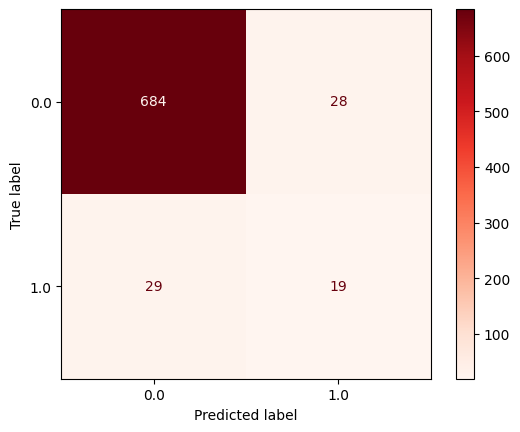

In [272]:
rf=RandomForestClassifier()

hyper_params = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "n_estimators":[100,300, 400, 500, 600],
                "criterion":["gini"]}
    
model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train_smote,y_train_smote)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
plt.show()

> ##### Gradient Boosting Classifier

GradientBoostingClassifier(min_samples_leaf=10, n_estimators=500)
Accuracy:[0.9197368421052632]
F1-Score:[0.419047619047619]
Precision:[0.4583333333333333]
Recall:[0.38596491228070173]
-------------------------------
Classifiaction Report
-------------------------------
              precision    recall  f1-score   support

         0.0      0.963     0.951     0.957       712
         1.0      0.386     0.458     0.419        48

    accuracy                          0.920       760
   macro avg      0.674     0.705     0.688       760
weighted avg      0.927     0.920     0.923       760

Confusion_Matrix


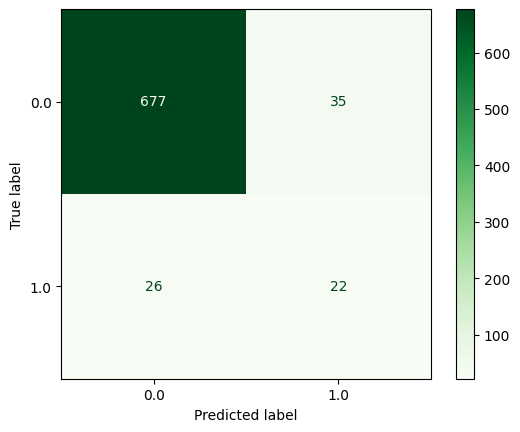

In [273]:
gbc_param_grid = {
                      "learning_rate": [0.05, 0.1, 0.02],
                      "n_estimators": [100,200,300,400,500],
                      "min_samples_split": [2,3,10],
                      "min_samples_leaf": [1,3,10]
                      }

gbc=GradientBoostingClassifier()
gbc_model= GridSearchCV(gbc, gbc_param_grid, cv=5, scoring="f1_macro", n_jobs=-1 )
gbc_model.fit(x_train_smote,y_train_smote)
y_pred= gbc_model.predict(x_test)
print(gbc_model.best_estimator_)

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Report")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()

> #### Voting Classifier

Accuracy:[0.8868421052631579]
F1-Score:[0.3768115942028985]
Precision:[0.5416666666666666]
Recall:[0.28888888888888886]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

         0.0      0.967     0.910     0.938       712
         1.0      0.289     0.542     0.377        48

    accuracy                          0.887       760
   macro avg      0.628     0.726     0.657       760
weighted avg      0.924     0.887     0.902       760

Confusion_Matrix


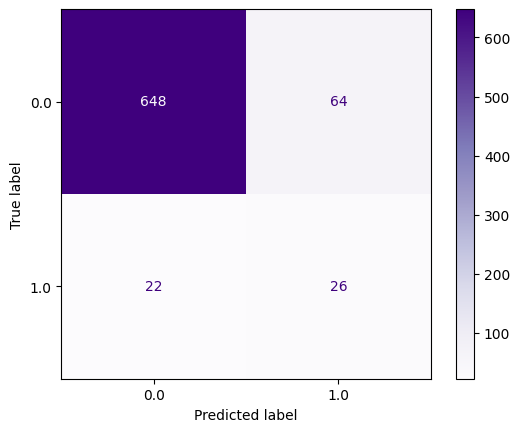

In [274]:
gbc=GradientBoostingClassifier()
gbc1=GradientBoostingClassifier(learning_rate=0.05, min_samples_split=3,n_estimators=500)
rf=RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=3)


voting_model= VotingClassifier(estimators=[('gradient_bosting1', gbc),('gradient_bosting2', gbc), ('gradient_bosting3', gbc), ('gradient_bosting4',gbc),('gradient_bosting5',gbc)], voting='hard', n_jobs=-1)
voting_model.fit(x_train_smote, y_train_smote)
y_pred=voting_model.predict(x_test)


accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))



# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Purples")
plt.show()

#### Analyze Data

Kami juga melakukan analisis modelling pada data. Tujuan melakukan modelling adalah untuk melatih data (train-test) agar dapat melakukan prediksi sesuai dengan pola data yang ada, sehingga data yang digunakan nantinya dapat lebih teroptimalisasi. Pada bagian modeling, kami menggunakan 3 metode ensambel yang berbeda yaitu : Random forest classifier, Gradien boosting classifier, dan Voting classifier. Kita menggunakan ketiga metode ini untuk membandingkan metode yang terbaik untuk melakukan modelling. Kita lihat data-data yang didapatkan setiap modelling :

1. Random Forest Classifier </br>
    - Accuracy: 92.50 %
    - F1-Score: 40.00 %
    - Precision: 39.58 %
    - Recall: 40.42 %
    
2. Gradien Boosting Classifier
    - Accuracy: 91.97 %
    - F1-Score: 41.9 %
    - Precision: 45.83 %
    - Recall: 38.59 %

3. Voting Classifier
    - Accuracy: 88.68 %
    - F1-Score: 37.68 %
    - Precision: 54.16 %
    - Recall: 28.88 %


Dari ketiga metode diatas Random Forest memiliki accuracy tertinggi, hal ini dikarenakan metode ini menggunakan model decision tree yang saling memperbaiki kesalahan dalam setiap modelnya. Untuk precision, metode Voting Classifier memiliki tingkat persentase tertinggi dikarenakan metode ini menggabungkan beberapa model sehingga sekumpulan data yang dimiliki menjadi besar. Namun untuk kemampuan recall, Random Forest memiliki persentase tertinggi yang berarti metode ini mencakup klasifikasi data yang lebih luas. Secara keseluruhan, Random Forest merupakan metode terbaik yang kita gunakan, ditunjukan dengan nilai F1-Score yang tertinggi diantara kedua metode lainnya yang berarti harmonisasi antara precision dan recallnya terbaik.